In [1]:
import pandas as pd
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<font face='Times New Roman'><h1>1 Load Dataset

In [2]:
kpmg = "https://cdn-assets.theforage.com/vinternship_modules/kpmg_data_analytics/KPMG_VI_New_raw_data_update_final.xlsx"

xls = pd.ExcelFile(kpmg)

sheet_names = xls.sheet_names

In [3]:
sheet_names

['Title Sheet',
 'Transactions',
 'NewCustomerList',
 'CustomerDemographic',
 'CustomerAddress']

In [4]:
dfs = {}

In [5]:
for sheet_name in sheet_names:
    dfs[sheet_name] = pd.read_excel(xls, sheet_name=sheet_name, header=None)
    dfs[sheet_name] = dfs[sheet_name].tail(-1)
    dfs[sheet_name].columns = dfs[sheet_name].iloc[0]
    dfs[sheet_name] = dfs[sheet_name][1:]
    dfs[sheet_name] = dfs[sheet_name].reset_index(drop=True)

In [6]:
Transactions = dfs['Transactions']
CustomerDemographic = dfs['CustomerDemographic']
CustomerAddress = dfs['CustomerAddress']

<font face="Comfortaa"><h1> 2 Data Validation</h1>
    <font face="Comfortaa"><h2>2.1 Transactions</h2>

In [7]:
Transactions.head()

1,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
1,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
2,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
3,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
4,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [8]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           20000 non-null  object
 1   product_id               20000 non-null  object
 2   customer_id              20000 non-null  object
 3   transaction_date         20000 non-null  object
 4   online_order             19640 non-null  object
 5   order_status             20000 non-null  object
 6   brand                    19803 non-null  object
 7   product_line             19803 non-null  object
 8   product_class            19803 non-null  object
 9   product_size             19803 non-null  object
 10  list_price               20000 non-null  object
 11  standard_cost            19803 non-null  object
 12  product_first_sold_date  19803 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB


In [9]:
#convert excel serial to date
base_date = datetime(1900, 1, 1)

def excel_serial_to_date(serial):
    if pd.isnull(serial):
        return pd.NaT  # Return NaT if the value is NaN or NaT
    return base_date + timedelta(days=serial - 2)

In [10]:
Transactions.describe(include='all')

1,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000,20000,20000,20000,19640,20000,19803,19803,19803,19803,20000.00,19803.00,19803
unique,20000,101,3494,364,2,2,6,4,3,3,296.00,103.00,100
top,1,0,2183,2017-02-14 00:00:00,True,Approved,Solex,Standard,medium,medium,2091.47,388.92,33879
freq,1,1378,14,82,9829,19821,4253,14176,13826,12990,465.00,465.00,234


<font face="Comfortaa"><h4> Documentation </h4>
    <h5><b>Numerical Variable:</b></h5>Columns <b>transaction_id</b>, <b>product_id</b>, <b>customer_id</b> are converted into integer. <b>list_price</b> & <b>standard_cost</b> are converted into float. 
    <h5><b>Binary Variable</b></h5>Columns <b>online_order</b>, <b>order_status</b> are binary variable (categorical) because they have distinct categories or levels, and they are used to indicate the presence or absence of a particular attribute or event.
    <h5><b>Categorical Variable</b></h5>Columns <b>brand</b>, <b>product_line</b>, <b>product_class</b>, <b>product_size</b> will also be converted to category type. 
    <h5><b>Date Time Variable</b></h5>Columns <b>product_first_sold_date</b> & <b>transaction_date</b> will also be converted to category type. 

In [11]:
#excel data convert
Transactions['product_first_sold_date'] = Transactions['product_first_sold_date'].apply(excel_serial_to_date)

#transaction date
Transactions['transaction_date'] = pd.to_datetime(Transactions['transaction_date'])

#primary key & foreign key 
Transactions['transaction_id'] = Transactions['transaction_id'].astype('int')
Transactions['product_id'] = Transactions['product_id'].astype('int')
Transactions['customer_id'] = Transactions['customer_id'].astype('int')

#price & cost 
Transactions['list_price'] = Transactions['list_price'].astype('float')
Transactions['standard_cost'] = Transactions['standard_cost'].astype('float')

#product details 
Transactions['brand'] = Transactions['brand'].astype('category')
Transactions['product_line'] = Transactions['product_line'].astype('category')
Transactions['product_class'] = Transactions['product_class'].astype('category')
Transactions['product_size'] = Transactions['product_size'].astype('category')

In [12]:
Transactions['order_status'].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [13]:
Transactions = Transactions[Transactions['order_status']=='Approved']

In [14]:
Transactions.isnull().sum()

1
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               354
order_status                 0
brand                      196
product_line               196
product_class              196
product_size               196
list_price                   0
standard_cost              196
product_first_sold_date    196
dtype: int64

<font face="Comfortaa"><h2>Transactions</h2>
The **Transactions** contains 20000 rows and 13 columns with missing values before cleaning.

<font face="Comfortaa"><ul>
    <li> **transaction_id**: Exhibiting unique entries without any missing values or duplicates.</li><li>**product_id**: Exhibiting unique entries without any missing values or duplicates.</li><li>**customer_id**:  Exhibiting unique entries without any missing values or duplicates.</li><li>**transaction_date**: Ranging between 1/1/2017 and 12/31/2017. No missing values are present in this column, and no changes have been applied.</li><li>**online_order**: The 'online_order' column encompasses 2 distinct categories. No missing values are present in this column, and no changes have been applied.</li><li>**order_status**: The 'order_status' column encompasses 2 distinct categories. No missing values are present in this column, and no changes have been applied. All order_status = 'Cancelled' were dropped to ensure all records listed are Approved transactions.</li><li>**brand**: The 'brand' column encompasses 6 distinct categories. All 196 missing values were left untouched.</li><li>**product_line**: TThe 'product_line' column encompasses 4 distinct categories. All 196 missing values were left untouched.</li><li>**product_class**: The 'product_class' column encompasses 3 distinct categories. All 196 missing values were left untouched.</li><li>**product_size**: The 'product_size' column encompasses 3 distinct categories. All 196 missing values were left untouched.</li><li>**list_price**: Ranges between 12 and 2091. No missing values are present in this column, and no changes have been applied.</li><li>**standard_cost**:  Ranges between 7 and 1759. All 196 missing values were left untouched.</li><li>**product_first_sold_date**: Ranges between 1991 and 2016. All 196 missing values were left untouched.


<font face="Comfortaa">After the data validation, the dataset contains **19821 rows and 13 columns**.

<font face="Comfortaa"><h2>2.2 CustomerAddress</h2>

In [15]:
CustomerAddress.head()

1,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [16]:
CustomerAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   object
 1   address             3999 non-null   object
 2   postcode            3999 non-null   object
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   object
dtypes: object(6)
memory usage: 187.6+ KB


In [17]:
CustomerAddress['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [18]:
state_map = {'New South Wales':'NSW', 'Victoria':'VIC'}
CustomerAddress['state'] = CustomerAddress['state'].replace(state_map)

In [19]:
CustomerAddress['customer_id'] = CustomerAddress['customer_id'].astype('int')
CustomerAddress['postcode'] = CustomerAddress['postcode'].astype('int')
CustomerAddress['property_valuation'] = CustomerAddress['property_valuation'].astype('int')
CustomerAddress['country'] = CustomerAddress['country'].astype('category')
CustomerAddress['state'] = CustomerAddress['state'].astype('category')

In [20]:
CustomerAddress.describe(include='all')

1,customer_id,address,postcode,state,country,property_valuation
count,3999.000000,3999,3999.000000,3999,3999,3999.000000
unique,NaN,3996,NaN,3,1,NaN
top,NaN,3 Mariners Cove Terrace,NaN,NSW,Australia,NaN
freq,NaN,2,NaN,2140,3999,NaN
mean,2003.987997,NaN,2985.755939,NaN,NaN,7.514379
std,1154.576912,NaN,844.878364,NaN,NaN,2.824663
min,1.000000,NaN,2000.000000,NaN,NaN,1.000000
25%,1004.500000,NaN,2200.000000,NaN,NaN,6.000000
50%,2004.000000,NaN,2768.000000,NaN,NaN,8.000000
75%,3003.500000,NaN,3750.000000,NaN,NaN,10.000000


<font face='Comfortaa'><h2>CustomerAddress</h2>
    The <b>CustomerAddress</b> contains 3999 rows and 6 columns with missing values before cleaning.
    
<font face="Comfortaa"><ul>
    <li> **customer_id**: Exhibiting unique entries without any missing values or duplicates.</li><li>**address**: No missing values are present in this column, and no changes have been applied.</li><li>**postcode**:  No missing values are present in this column, and no changes have been applied.</li><li>**postcode**:  No missing values are present in this column, and no changes have been applied.</li><li>**state**: The state column should encompasses 3 distinct categories. To ensure consistency within the dataset, instances containing 'New South Wales' have been replaced with 'NSW' while 'Victoria' have been replaced with 'VIC'.</li><li>**country**: No missing values are present in this column, and no changes have been applied.</li><li>**property_valuation**: No missing values are present in this column, and no changes have been applied.</li>


<font face="Comfortaa">
After the data validation, the dataset contains **3999 rows and 6 columns**.</font>

<font face='Comfortaa'><h2>2.3 CustomerDemographic</h2>

In [21]:
CustomerDemographic.head()

1,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8


In [22]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          4000 non-null   object
 1   first_name                           4000 non-null   object
 2   last_name                            3875 non-null   object
 3   gender                               4000 non-null   object
 4   past_3_years_bike_related_purchases  4000 non-null   object
 5   DOB                                  3913 non-null   object
 6   job_title                            3494 non-null   object
 7   job_industry_category                3344 non-null   object
 8   wealth_segment                       4000 non-null   object
 9   deceased_indicator                   4000 non-null   object
 10  default                              3698 non-null   object
 11  owns_car                             4000 n

In [23]:
#drop redundant columns & name for privacy
CustomerDemographic = CustomerDemographic.drop(axis =1, columns=['default','first_name','last_name'])

In [24]:
#drop missing values with <5%
cols_to_drop = CustomerDemographic.columns[CustomerDemographic.isna().sum() <= len(CustomerDemographic) * 0.05]
CustomerDemographic = CustomerDemographic.dropna(subset = cols_to_drop)

In [25]:
#primary key
CustomerDemographic['customer_id'] = CustomerDemographic['customer_id'].astype('int')

#numerical
CustomerDemographic['past_3_years_bike_related_purchases'] = CustomerDemographic['past_3_years_bike_related_purchases'].astype('int')
CustomerDemographic['tenure'] = CustomerDemographic['tenure'].astype('int')

#date
CustomerDemographic['DOB'] = pd.to_datetime(CustomerDemographic['DOB'])

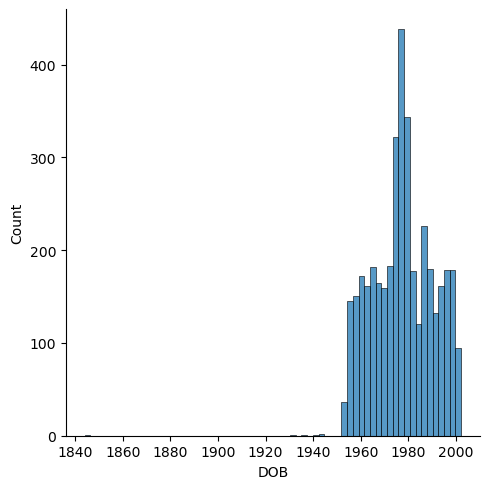

In [26]:
sns.displot(data = CustomerDemographic, x = 'DOB', kind='hist')
plt.show()

<font face='Comfortaa'> 
    There are extreme outliers present at the lower, considering 70 y/o is the threshold age of cyclist. The customer with year of birth date earlier than 1953 was replaced by median of the 

In [27]:
CustomerDemographic.loc[CustomerDemographic['DOB'].dt.year < 1953]

1,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
33,34,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20
657,658,Male,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,Yes,8
719,720,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,No,6
1091,1092,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,No,5
2412,2413,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,Yes,17
3409,3410,Female,93,1940-09-22,NaN,Property,Mass Customer,N,No,16


In [28]:
birth_year = CustomerDemographic['DOB'].dt.year
birth_year.median()

1977.0

In [29]:
DOB_to_replace = CustomerDemographic[CustomerDemographic['DOB'].dt.year < 1953]['DOB']
CustomerDemographic.loc[DOB_to_replace.index, 'DOB'] = DOB_to_replace.apply(lambda x: x.replace(year=1977))

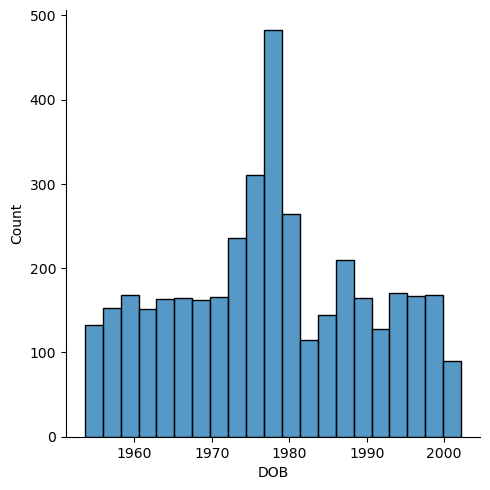

In [30]:
sns.displot(data = CustomerDemographic, x = 'DOB', kind='hist')
plt.show()

In [31]:
last_transaction_date = Transactions['transaction_date'].max()

In [32]:
CustomerDemographic['age'] = last_transaction_date.year - CustomerDemographic['DOB'].dt.year
CustomerDemographic['age'] = CustomerDemographic['age'].astype('int')

In [33]:
gender_map = {"F":"Female", "Femal":"Female", "M":"Male"}
CustomerDemographic['gender'] = CustomerDemographic['gender'].replace(gender_map)

In [34]:
#category
CustomerDemographic['gender'] = CustomerDemographic['gender'].astype('category')
CustomerDemographic['job_title'] = CustomerDemographic['job_title'].astype('category')
CustomerDemographic['job_industry_category'] = CustomerDemographic['job_industry_category'].astype('category')
CustomerDemographic['wealth_segment'] = CustomerDemographic['wealth_segment'].astype('category')
CustomerDemographic['deceased_indicator'] = CustomerDemographic['deceased_indicator'].astype('category')
CustomerDemographic['owns_car'] = CustomerDemographic['owns_car'].astype('category')

In [35]:
CustomerDemographic.describe(include='all', datetime_is_numeric=True)

1,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
count,3913.000000,3913,3913.000000,3913,3416,3257,3913,3913,3913,3913.000000,3913.000000
unique,NaN,3,NaN,NaN,195,9,3,2,2,NaN,NaN
top,NaN,Female,NaN,NaN,Business Systems Development Analyst,Manufacturing,Mass Customer,N,Yes,NaN,NaN
freq,NaN,2039,NaN,NaN,43,796,1954,3911,1974,NaN,NaN
mean,1999.325837,NaN,49.041912,1977-08-12 10:16:02.330692576,NaN,NaN,NaN,NaN,NaN,10.657041,39.886021
min,1.000000,NaN,0.000000,1953-08-09 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,15.000000
25%,1002.000000,NaN,24.000000,1968-02-16 00:00:00,NaN,NaN,NaN,NaN,NaN,6.000000,30.000000
50%,1999.000000,NaN,48.000000,1977-08-04 00:00:00,NaN,NaN,NaN,NaN,NaN,11.000000,40.000000
75%,2997.000000,NaN,73.000000,1987-02-28 00:00:00,NaN,NaN,NaN,NaN,NaN,15.000000,49.000000
max,4000.000000,NaN,99.000000,2002-03-11 00:00:00,NaN,NaN,NaN,NaN,NaN,22.000000,64.000000


In [36]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3913 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3913 non-null   int32         
 1   gender                               3913 non-null   category      
 2   past_3_years_bike_related_purchases  3913 non-null   int32         
 3   DOB                                  3913 non-null   datetime64[ns]
 4   job_title                            3416 non-null   category      
 5   job_industry_category                3257 non-null   category      
 6   wealth_segment                       3913 non-null   category      
 7   deceased_indicator                   3913 non-null   category      
 8   owns_car                             3913 non-null   category      
 9   tenure                               3913 non-null   int32         
 10  age         

In [37]:
CustomerDemographic.isnull().sum()

1
customer_id                              0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                              497
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
age                                      0
dtype: int64

<font face='Comfortaa'><h2>CustomerDemographic</h2></font>
<font face='Comfortaa'>
The **CustomerDemographic** contains 4000 rows and 10 columns with missing values before cleaning.</font>
<font face='Comfortaa'><ul><li> **customer_id**: Exhibiting unique entries without any missing values or duplicates.</li><li>**gender**: The 'gender' column should encompasses 3 distinct categories. To ensure consistency within the dataset, instances containing 'Femal', 'F' have been replaced with 'Female' while 'M' have been replaced with 'Male'.</li><li>**past_3_years_bike_related_purchases**: Ranging between 0 and 100. No missing values are present in this column, and no changes have been applied.</li><li>**DOB**: Birth Year Ranging between 1843 and 2002. There were 87 instances with missing values, which were dropped because the missing values is less than 5% of overall data. Birth Year with earlier than  1953 were all replaced by median.</li><li>**job_title**: All 497 instances with missing values were left untouched.</li><li>**job_industry_category**: The 'job_industry_category' column encompasses 9 distinct categories. All 656 instances with missing values were left untouched.</li><li>**wealth_segment**: The 'job_industry_category' column encompasses 3 distinct categories. No missing values are present in this column, and no changes have been applied.</li><li>deceased_indicator**: The 'deceased_indicator' column encompasses 2 distinct categories. No missing values are present in this column, and no changes have been applied.</li><li>**owns_car**: The 'owns_car' column encompasses 2 distinct categories. No missing values are present in this column, and no changes have been applied.</li><li>**tenure**: Ranging between 0 and 100. There were 87 instances with missing values, which were dropped because the missing values is less than 5% of overall data.</li>

<font face='Comfortaa'>**Added Feature**
<font face='Comfortaa'><ul><li>**age**: The age column was calculated by subtracting the year of last transaction date by the year of DOB. <br>          After the data validation, the dataset contains **3913 rows and 11 columns**.</li>
    


<font face="Comfortaa">
After the data validation, the dataset contains **3999 rows and 6 columns**.</font>

<font face='Comfortaa'><h2> 2.4 RFM Analysis

In [38]:
last_transaction_date

Timestamp('2017-12-30 00:00:00')

In [39]:
RFM = Transactions.groupby('customer_id').agg(
    last_transaction_date=('transaction_date', 'max'),
    frequency=('transaction_id', 'count'),
    monetary=('list_price', 'sum')
).reset_index()
RFM

,customer_id,last_transaction_date,frequency,monetary
0,1,2017-12-23,11,9084.45
1,2,2017-08-24,3,4149.07
2,3,2017-09-19,8,9888.23
3,4,2017-06-18,2,1047.72
4,5,2017-12-14,6,5903.20
...,...,...,...,...
3488,3497,2017-11-08,3,3744.07
3489,3498,2017-08-25,6,5177.06
3490,3499,2017-11-09,7,7673.48
3491,3500,2017-08-08,6,4922.41


In [40]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_id            3493 non-null   int64         
 1   last_transaction_date  3493 non-null   datetime64[ns]
 2   frequency              3493 non-null   int64         
 3   monetary               3493 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 109.3 KB


In [41]:
RFM['recency'] = last_transaction_date - pd.to_datetime(RFM['last_transaction_date'])

In [42]:
def calculate_score(value):
    percentile_20 = np.percentile(value, 20)
    percentile_40 = np.percentile(value, 40)
    percentile_60 = np.percentile(value, 60)
    percentile_80 = np.percentile(value, 80)

    val_scores = []
    for val in value:
        if val <= percentile_20:
            val_scores.append("1")
        elif val <= percentile_40:
            val_scores.append("2")
        elif val <= percentile_60:
            val_scores.append("3")
        elif val <= percentile_80:
            val_scores.append("4")
        else:
            val_scores.append("5")
    
    return val_scores

In [43]:
def calculate_r_score(value):
    percentile_20 = np.percentile(value, 20)
    percentile_40 = np.percentile(value, 40)
    percentile_60 = np.percentile(value, 60)
    percentile_80 = np.percentile(value, 80)

    val_scores = []
    for val in value:
        if val <= percentile_20:
            val_scores.append("5")
        elif val <= percentile_40:
            val_scores.append("4")
        elif val <= percentile_60:
            val_scores.append("3")
        elif val <= percentile_80:
            val_scores.append("2")
        else:
            val_scores.append("1")
    
    return val_scores

In [44]:
RFM['R Score'] = calculate_r_score(RFM['recency'])
RFM['F Score'] = calculate_score(RFM['frequency'])
RFM['M Score'] = calculate_score(RFM['monetary'])

In [45]:
RFM['RFM Score'] = RFM['R Score'].astype('str')+RFM['F Score'].astype('str')+RFM['M Score'].astype('str')

<font face='Comfortaa'><h3> 2.4.1 RFM Score

In [46]:
rfm_score = pd.read_excel('assets/RFM Scores.xlsx')

In [47]:
rfm_score

,Segment,Scores
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 231, 241, 251, 233, 232, 223, 222, 1..."


In [48]:
rfm_score = rfm_score['Scores'].str.split(',').explode().str.split(' ').explode().reset_index()\
.merge(rfm_score.reset_index()[['index','Segment']], on = 'index')

In [49]:
rfm_score = rfm_score[rfm_score['Scores'] !='']

In [50]:
rfm_score = rfm_score.drop_duplicates(subset='Scores')

In [51]:
rfm_score.head()

,index,Scores,Segment
0,0,555,Champions
2,0,554,Champions
4,0,544,Champions
6,0,545,Champions
8,0,454,Champions


In [52]:
RFM.head()

,customer_id,last_transaction_date,frequency,monetary,recency,R Score,F Score,M Score,RFM Score
0,1,2017-12-23,11,9084.45,7 days,5,5,5,555
1,2,2017-08-24,3,4149.07,128 days,1,1,2,112
2,3,2017-09-19,8,9888.23,102 days,1,4,5,145
3,4,2017-06-18,2,1047.72,195 days,1,1,1,111
4,5,2017-12-14,6,5903.20,16 days,4,3,3,433


<font face='Comfortaa'><h3> 2.4.2 Customer Segmentation

In [53]:
RFM = RFM.merge(rfm_score, left_on = 'RFM Score', right_on='Scores')

In [54]:
RFM.head()

,customer_id,last_transaction_date,frequency,monetary,recency,R Score,F Score,M Score,RFM Score,index,Scores,Segment
0,1,2017-12-23,11,9084.45,7 days,5,5,5,555,0,555,Champions
1,25,2017-12-25,12,9996.33,5 days,5,5,5,555,0,555,Champions
2,37,2017-12-23,9,11291.71,7 days,5,5,5,555,0,555,Champions
3,89,2017-12-26,9,12741.44,4 days,5,5,5,555,0,555,Champions
4,109,2017-12-22,10,10661.51,8 days,5,5,5,555,0,555,Champions


In [55]:
RFM['Segment'].value_counts()

Hibernating customers    563
Champions                463
New Customers            426
At Risk                  411
Loyal                    377
Lost customers           365
Potential Loyalist       277
Need Attention           216
Promising                195
About To Sleep           114
Cannot Lose Them          86
Name: Segment, dtype: int64

<font face='Comfortaa'><h3> 2.4.3 High value Lead

<font face='Comfortaa'><h3>
    **Customer RFM Scores Alongside Demographic and Address Information**<br></h3>
The RFM scores for each individual customer, accompanied by their comprehensive demographic and address particulars, were computed utilizing the methodology delineated within the following <a href='https://ploiitubsamon.medium.com/rfm-analysis-for-customer-segmentation-with-power-bi-5d2f5bd62038'>RFM ANALYSIS blog</a>. Subsequent to the calculation of RFM scores, customers were categorized into distinct segments based on the prescribed table within the same blog post. As part of the subsequent process involving the construction of a classification model, a supplementary column will be introduced. This column will assign a value of 1 to customers categorized as "Champions" or "Loyal," while assigning a value of 0 to those falling under other segments.

In [56]:
demographic = CustomerDemographic.merge(CustomerAddress)

In [57]:
demographic.head()

1,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,address,postcode,state,country,property_valuation
0,1,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11,64,060 Morning Avenue,2016,NSW,Australia,10
1,2,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,37,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7,56,0 Holy Cross Court,4211,QLD,Australia,9
3,5,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8,40,17979 Del Mar Point,2448,NSW,Australia,4
4,6,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13,51,9 Oakridge Court,3216,VIC,Australia,9


In [58]:
RFM.head()

,customer_id,last_transaction_date,frequency,monetary,recency,R Score,F Score,M Score,RFM Score,index,Scores,Segment
0,1,2017-12-23,11,9084.45,7 days,5,5,5,555,0,555,Champions
1,25,2017-12-25,12,9996.33,5 days,5,5,5,555,0,555,Champions
2,37,2017-12-23,9,11291.71,7 days,5,5,5,555,0,555,Champions
3,89,2017-12-26,9,12741.44,4 days,5,5,5,555,0,555,Champions
4,109,2017-12-22,10,10661.51,8 days,5,5,5,555,0,555,Champions


In [59]:
high_lead_val = ["Champions","Loyal"]

RFM['high_val_lead'] = RFM['Segment'].apply(lambda x: 1 if x in high_lead_val else 0)

In [60]:
RFM.head()

,customer_id,last_transaction_date,frequency,monetary,recency,R Score,F Score,M Score,RFM Score,index,Scores,Segment,high_val_lead
0,1,2017-12-23,11,9084.45,7 days,5,5,5,555,0,555,Champions,1
1,25,2017-12-25,12,9996.33,5 days,5,5,5,555,0,555,Champions,1
2,37,2017-12-23,9,11291.71,7 days,5,5,5,555,0,555,Champions,1
3,89,2017-12-26,9,12741.44,4 days,5,5,5,555,0,555,Champions,1
4,109,2017-12-22,10,10661.51,8 days,5,5,5,555,0,555,Champions,1


In [61]:
RFM = RFM[['customer_id', 'high_val_lead']]

In [62]:
demographic_RFM = RFM.merge(demographic)

In [63]:
demographic_RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3412 entries, 0 to 3411
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3412 non-null   int64         
 1   high_val_lead                        3412 non-null   int64         
 2   gender                               3412 non-null   category      
 3   past_3_years_bike_related_purchases  3412 non-null   int32         
 4   DOB                                  3412 non-null   datetime64[ns]
 5   job_title                            2997 non-null   category      
 6   job_industry_category                2852 non-null   category      
 7   wealth_segment                       3412 non-null   category      
 8   deceased_indicator                   3412 non-null   category      
 9   owns_car                             3412 non-null   category      
 10  tenure      

<font face='Comfortaa'><h2> 3 Feature Selection

In [64]:
features = demographic_RFM.drop(axis=1, columns=['high_val_lead','DOB','customer_id'])
y = demographic_RFM['high_val_lead']

In [65]:
features = pd.get_dummies(features, drop_first=True)
features.head()

,past_3_years_bike_related_purchases,tenure,age,postcode,property_valuation,gender_Male,gender_U,job_title_Account Executive,job_title_Account Representative I,job_title_Account Representative II,...,address_99826 Steensland Avenue,address_9984 Pankratz Road,address_99841 Talisman Street,address_9985 Barnett Circle,address_9987 Stuart Alley,address_9989 Toban Way,address_999 Huxley Hill,address_9993 Mccormick Street,state_QLD,state_VIC
0,93,11,64,2016,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,72,21,41,4413,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,46,16,32,4726,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,74,14,50,2100,11,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16,4,39,2217,11,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
features_cat = features.iloc[:,5:]
features_num = features.iloc[:,:5]

In [67]:
X_num = features_num.values
X_cat = features_cat.values

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [69]:
X_num = scaler.fit_transform(X_num)
X = np.concatenate((X_num, X_cat), axis=1)

<font face='Comfortaa'><h2> 3 Train Validation Test Split

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

<font face='Comfortaa'><h2> 4 Define Functions

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def scores(y_val, y_pred):
    cm = confusion_matrix(y_val, y_pred)
    tn, fp, fn, tp = cm.ravel()
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0  # Avoid division by zero
    f1 = f1_score(y_val, y_pred)

    # Print the calculated metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall (Sensitivity):", recall)
    print("Specificity:", specificity)
    print("F1-Score:", f1)

In [72]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

def confusion_matrix_(y_val,y_pred):
    confusion_matrix_ = confusion_matrix(y_val,y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_, display_labels = [False, True])
    cm_display.plot()
    plt.show()

<font face='Comfortaa'><h2> 5 Base Model

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
LR = LogisticRegression(random_state = 28)

In [75]:
LR.fit(X_train, y_train)

LogisticRegression(random_state=28)

In [76]:
y_pred = LR.predict(X_val)

In [77]:
scores(y_val, y_pred)

Accuracy: 0.7379209370424598
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 0.9960474308300395
F1-Score: 0.0


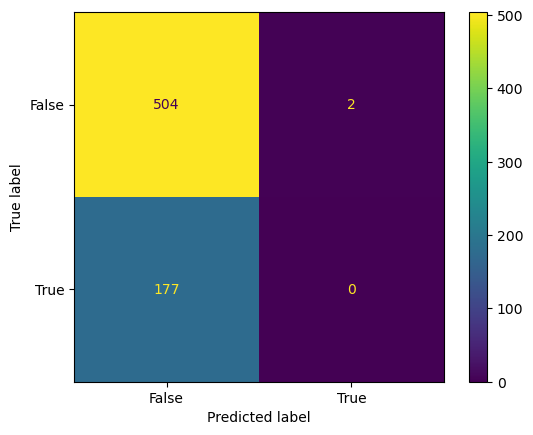

In [78]:
confusion_matrix_(y_val,y_pred)

<font face='Comfortaa'> Considering the confusion matrix and performance metrics, the initial model faced challenges in accurately predicting true positive labels. This difficulty might be attributed to the extensive number of categorical features, approximately 3000 after applying the "get_dummies" method. Therefore, the subsequent course of action should involve feature selection.

<font face='Comfortaa'><h2> 6 Model Development

<font face='Comfortaa'><h3> 6.1 Feature Selection

<font face='Comfortaa'><h4> 6.1.2 Random Forest Classifier Feature Importance

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Assuming you have already defined X and y

models = {
    "Random Forest": RandomForestClassifier(random_state=28),
    "Gradient Boosting": GradientBoostingClassifier(random_state=28)
}

feature_importance = {
    'model': [],
    'value': [],
    'feature_no': []
}

for model_name, model_instance in models.items():
    model_instance.fit(X, y)
    importances = model_instance.feature_importances_
    for i, importance in enumerate(importances):
        feature_importance['model'].append(model_name)
        feature_importance['value'].append(importance)
        feature_importance['feature_no'].append(i)


In [80]:
feature_importance_rf_gb = pd.DataFrame({'model':feature_importance['model'],\
                          'value': feature_importance['value'],\
                            'feature_no': feature_importance['feature_no']
                            })

In [81]:
feature_importance_rf_gb = feature_importance_rf_gb.sort_values(by=['value'], ascending=False)

<font face='Comfortaa'><h4> 6.1.3 Feature Selection

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [83]:
# Initialize the models
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000,random_state=28),
    'GaussianNB': GaussianNB(),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=28),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(random_state=28),
    'RandomForestClassifier': RandomForestClassifier(random_state=28),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=28),
    'XGBClassifier': XGBClassifier(random_state=28)
}

In [84]:
# Dictionary to store results
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'Specificity': [],
    'F1 Score': [],
    'n_features':[],
    'fp':[],
    'tp':[],
    'tn':[],
    'fn':[],
    'fi_model':[]
}

LogisticRegression
5
Accuracy: 0.7862371888726208
Precision: 0.3333333333333333
Recall (Sensitivity): 0.013888888888888888
Specificity: 0.9925788497217068
F1-Score: 0.026666666666666665


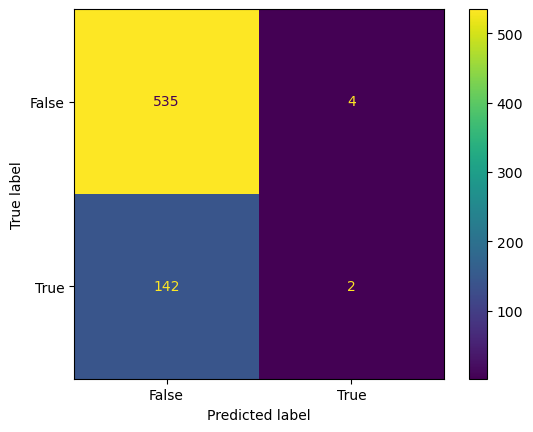

LogisticRegression
20
Accuracy: 0.780380673499268
Precision: 0.3125
Recall (Sensitivity): 0.034722222222222224
Specificity: 0.9795918367346939
F1-Score: 0.0625


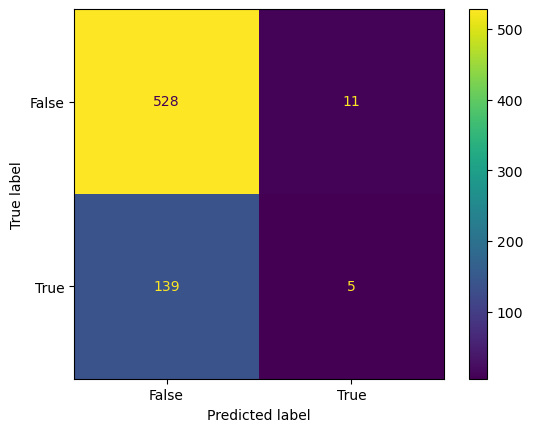

LogisticRegression
100
Accuracy: 0.780380673499268
Precision: 0.3125
Recall (Sensitivity): 0.034722222222222224
Specificity: 0.9795918367346939
F1-Score: 0.0625


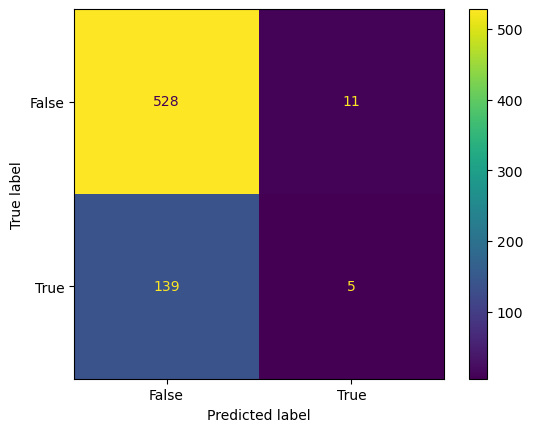

LogisticRegression
200
Accuracy: 0.7789165446559297
Precision: 0.26666666666666666
Recall (Sensitivity): 0.027777777777777776
Specificity: 0.9795918367346939
F1-Score: 0.05031446540880503


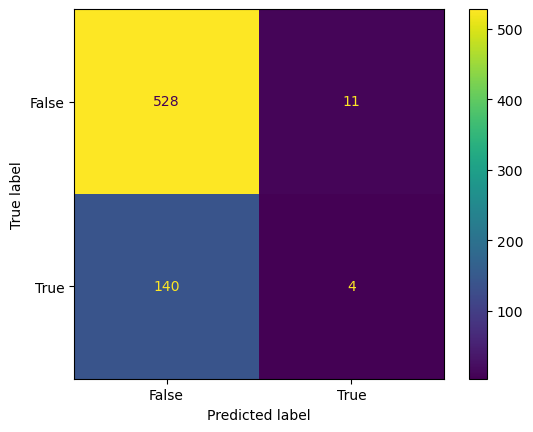

LogisticRegression
500
Accuracy: 0.780380673499268
Precision: 0.3125
Recall (Sensitivity): 0.034722222222222224
Specificity: 0.9795918367346939
F1-Score: 0.0625


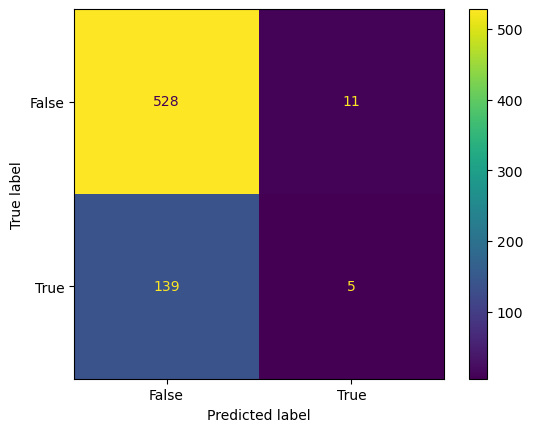

LogisticRegression
1000
Accuracy: 0.780380673499268
Precision: 0.3125
Recall (Sensitivity): 0.034722222222222224
Specificity: 0.9795918367346939
F1-Score: 0.0625


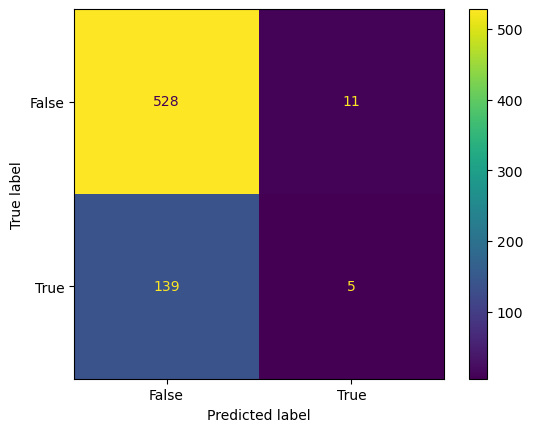

LogisticRegression
1500
Accuracy: 0.7774524158125915
Precision: 0.21428571428571427
Recall (Sensitivity): 0.020833333333333332
Specificity: 0.9795918367346939
F1-Score: 0.0379746835443038


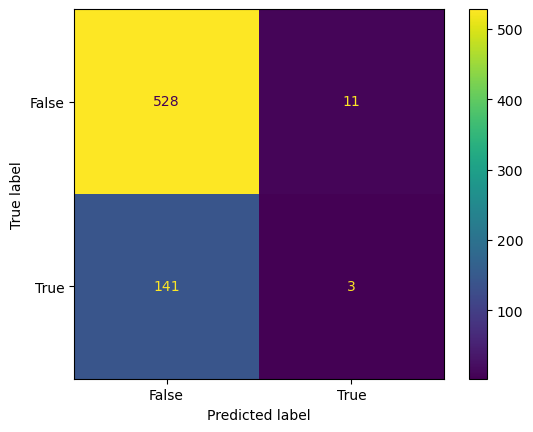

LogisticRegression
2500
Accuracy: 0.7789165446559297
Precision: 0.26666666666666666
Recall (Sensitivity): 0.027777777777777776
Specificity: 0.9795918367346939
F1-Score: 0.05031446540880503


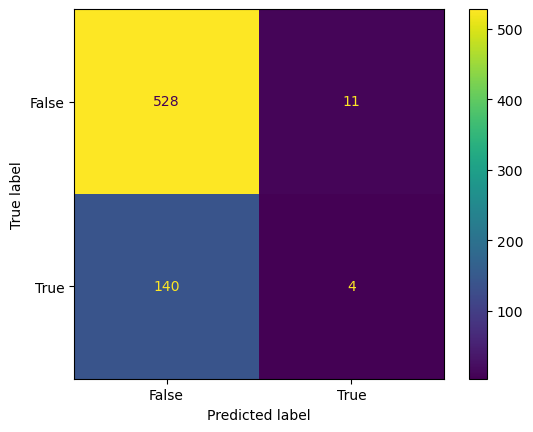

GaussianNB
5
Accuracy: 0.787701317715959
Precision: 0.4444444444444444
Recall (Sensitivity): 0.027777777777777776
Specificity: 0.9907235621521335
F1-Score: 0.05228758169934641


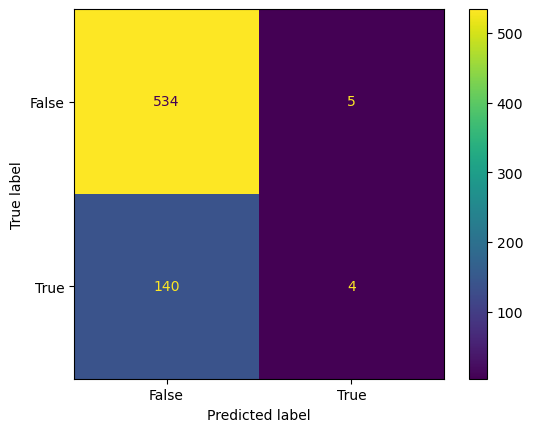

GaussianNB
20
Accuracy: 0.7730600292825769
Precision: 0.34285714285714286
Recall (Sensitivity): 0.08333333333333333
Specificity: 0.9573283858998145
F1-Score: 0.1340782122905028


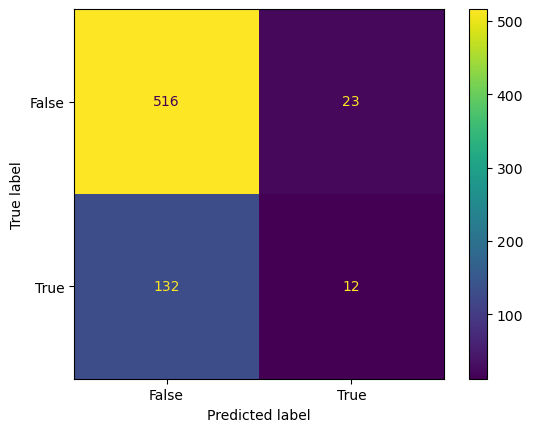

GaussianNB
100
Accuracy: 0.7862371888726208
Precision: 0.3333333333333333
Recall (Sensitivity): 0.013888888888888888
Specificity: 0.9925788497217068
F1-Score: 0.026666666666666665


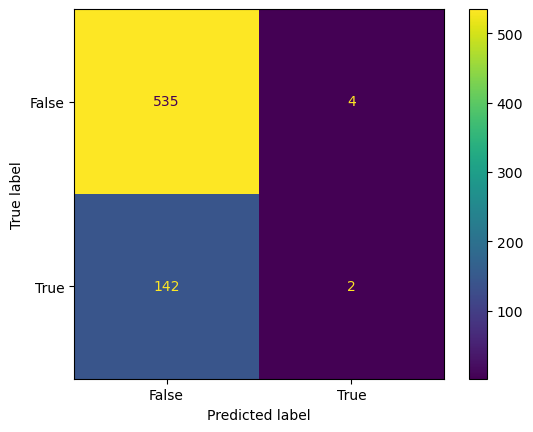

GaussianNB
200
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


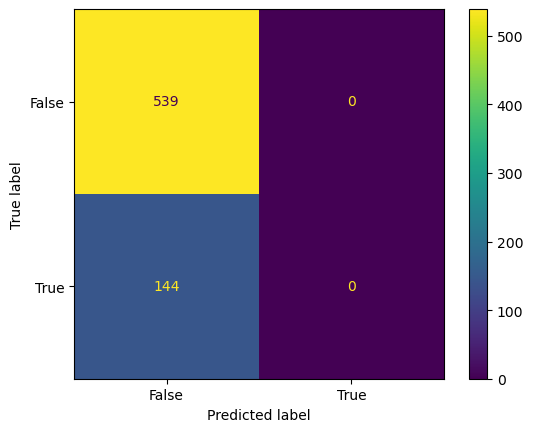

GaussianNB
500


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.7862371888726208
Precision: 0.25
Recall (Sensitivity): 0.006944444444444444
Specificity: 0.9944341372912802
F1-Score: 0.013513513513513514


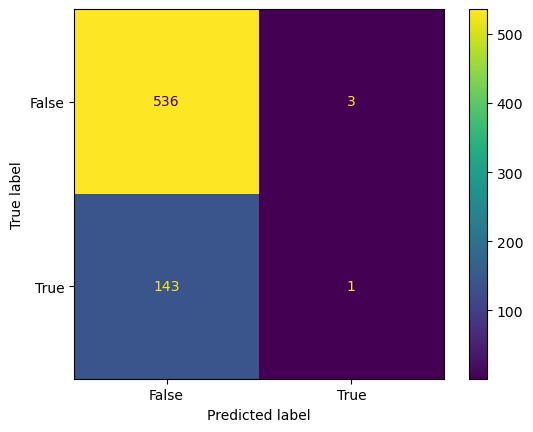

GaussianNB
1000
Accuracy: 0.20937042459736457
Precision: 0.20967741935483872
Recall (Sensitivity): 0.9930555555555556
Specificity: 0.0
F1-Score: 0.34624697336561744


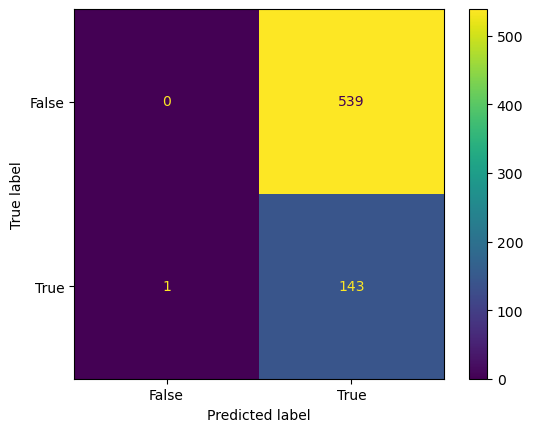

GaussianNB
1500
Accuracy: 0.20937042459736457
Precision: 0.20967741935483872
Recall (Sensitivity): 0.9930555555555556
Specificity: 0.0
F1-Score: 0.34624697336561744


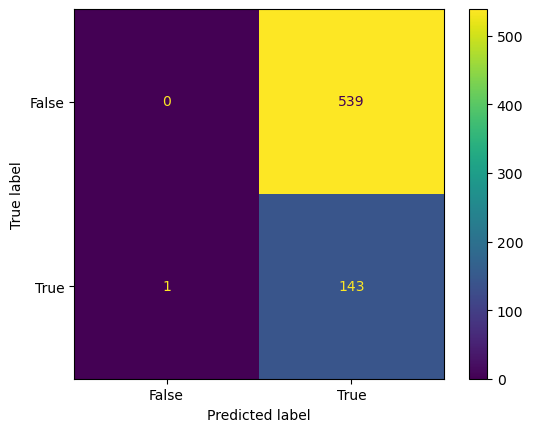

GaussianNB
2500
Accuracy: 0.25036603221083453
Precision: 0.21339563862928349
Recall (Sensitivity): 0.9513888888888888
Specificity: 0.06307977736549165
F1-Score: 0.3486005089058524


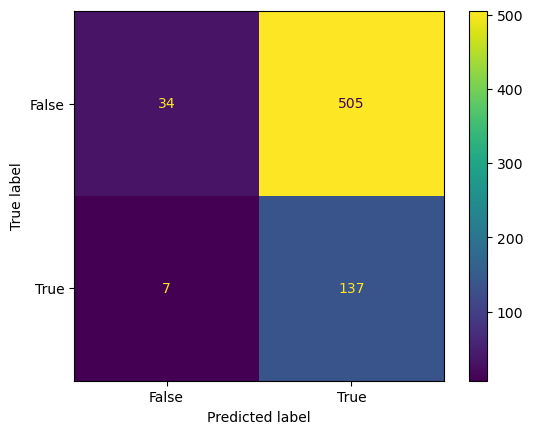

DecisionTreeClassifier
5
Accuracy: 0.6530014641288433
Precision: 0.24022346368715083
Recall (Sensitivity): 0.2986111111111111
Specificity: 0.7476808905380334
F1-Score: 0.26625386996904027


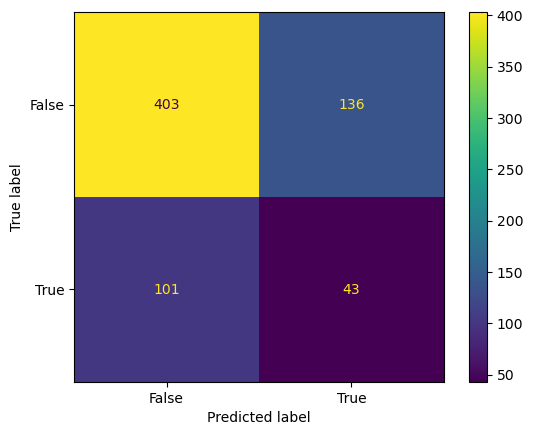

DecisionTreeClassifier
20
Accuracy: 0.6325036603221084
Precision: 0.19428571428571428
Recall (Sensitivity): 0.2361111111111111
Specificity: 0.738404452690167
F1-Score: 0.21316614420062696


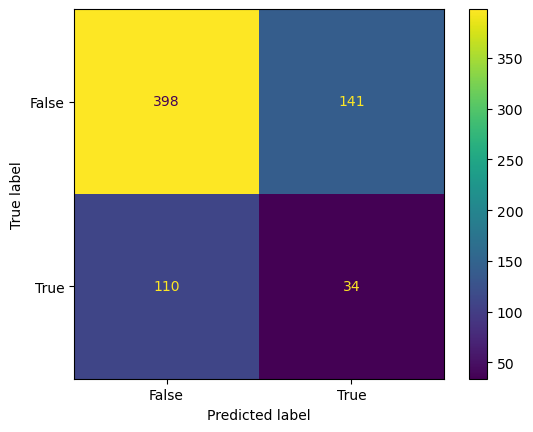

DecisionTreeClassifier
100
Accuracy: 0.6544655929721815
Precision: 0.2261904761904762
Recall (Sensitivity): 0.2638888888888889
Specificity: 0.7588126159554731
F1-Score: 0.24358974358974356


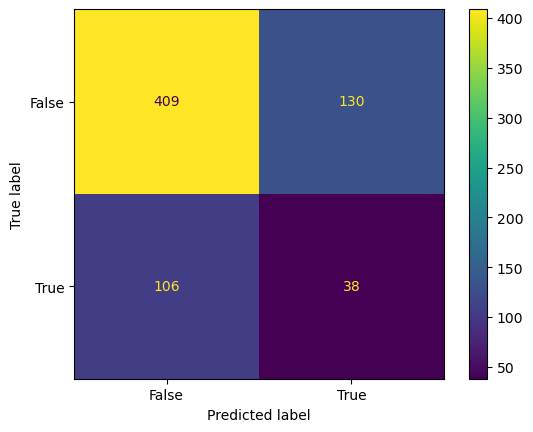

DecisionTreeClassifier
200
Accuracy: 0.6691068814055637
Precision: 0.25301204819277107
Recall (Sensitivity): 0.2916666666666667
Specificity: 0.7699443413729128
F1-Score: 0.2709677419354839


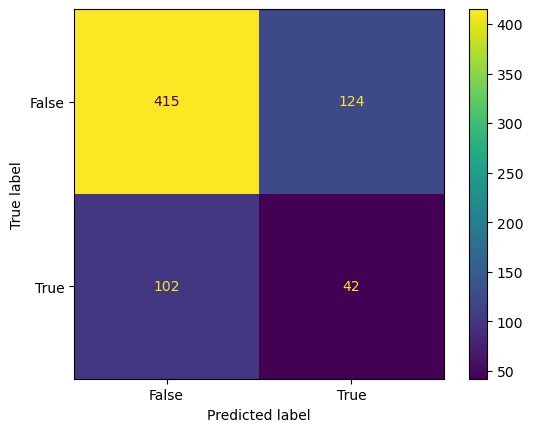

DecisionTreeClassifier
500
Accuracy: 0.6676427525622255
Precision: 0.2214765100671141
Recall (Sensitivity): 0.22916666666666666
Specificity: 0.7847866419294991
F1-Score: 0.22525597269624575


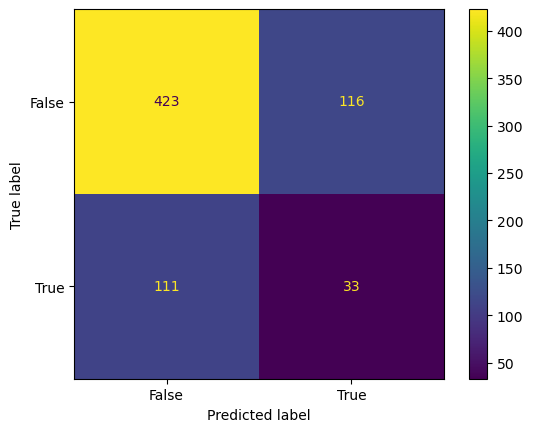

DecisionTreeClassifier
1000
Accuracy: 0.677891654465593
Precision: 0.2323943661971831
Recall (Sensitivity): 0.22916666666666666
Specificity: 0.7977736549165121
F1-Score: 0.23076923076923078


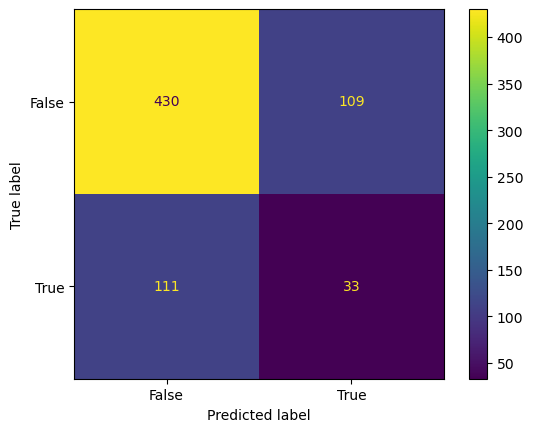

DecisionTreeClassifier
1500
Accuracy: 0.677891654465593
Precision: 0.22058823529411764
Recall (Sensitivity): 0.20833333333333334
Specificity: 0.8033395176252319
F1-Score: 0.21428571428571427


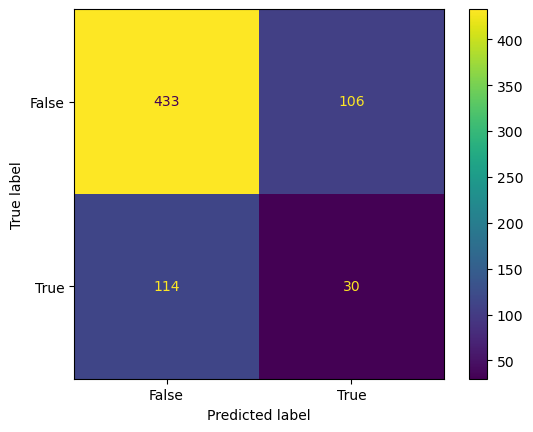

DecisionTreeClassifier
2500
Accuracy: 0.6939970717423133
Precision: 0.23140495867768596
Recall (Sensitivity): 0.19444444444444445
Specificity: 0.8274582560296846
F1-Score: 0.21132075471698114


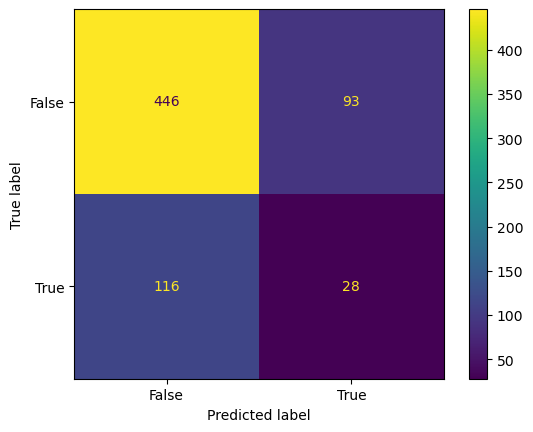

KNeighborsClassifier
5
Accuracy: 0.7408491947291361
Precision: 0.24615384615384617
Recall (Sensitivity): 0.1111111111111111
Specificity: 0.9090909090909091
F1-Score: 0.15311004784688995


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


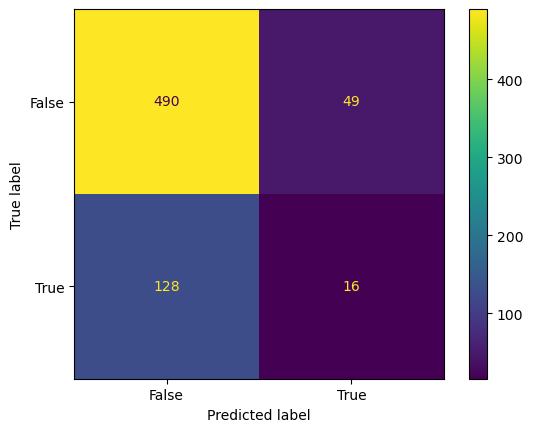

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier
20
Accuracy: 0.7335285505124451
Precision: 0.1935483870967742
Recall (Sensitivity): 0.08333333333333333
Specificity: 0.9072356215213359
F1-Score: 0.11650485436893204


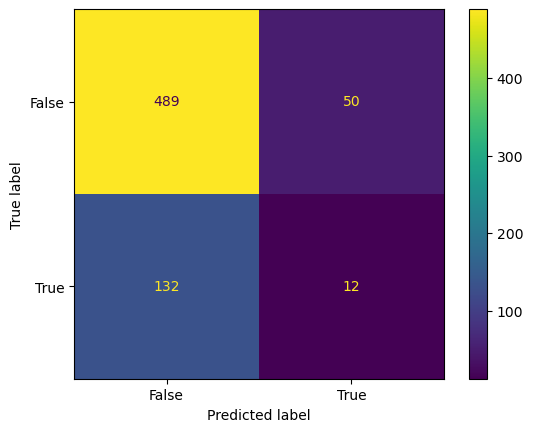

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier
100
Accuracy: 0.7510980966325037
Precision: 0.24
Recall (Sensitivity): 0.08333333333333333
Specificity: 0.9294990723562152
F1-Score: 0.12371134020618556


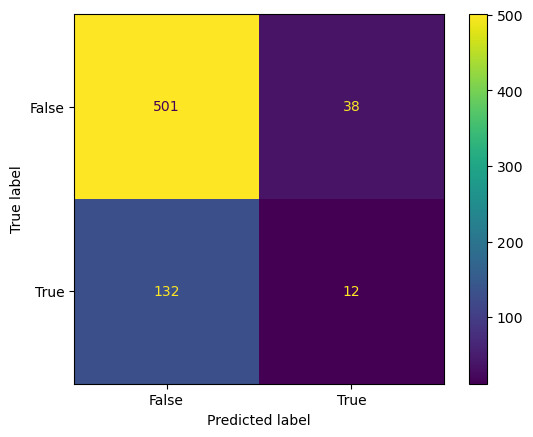

KNeighborsClassifier
200
Accuracy: 0.7642752562225475
Precision: 0.22580645161290322
Recall (Sensitivity): 0.04861111111111111
Specificity: 0.9554730983302412
F1-Score: 0.07999999999999999


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


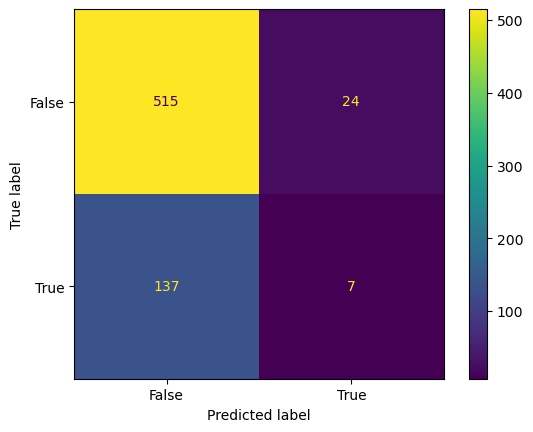

KNeighborsClassifier
500
Accuracy: 0.7598828696925329
Precision: 0.08333333333333333
Recall (Sensitivity): 0.013888888888888888
Specificity: 0.9591836734693877
F1-Score: 0.02380952380952381


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


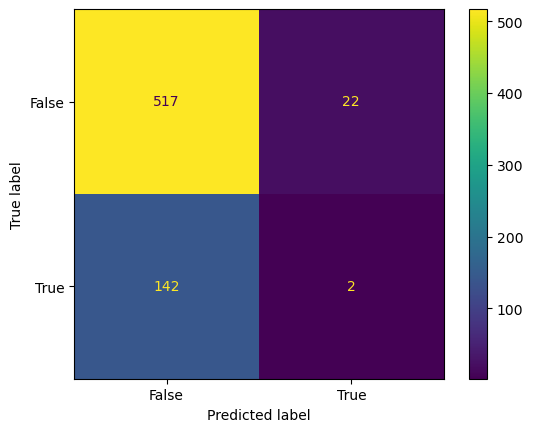

KNeighborsClassifier
1000
Accuracy: 0.7569546120058566
Precision: 0.13333333333333333
Recall (Sensitivity): 0.027777777777777776
Specificity: 0.9517625231910947
F1-Score: 0.04597701149425287


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


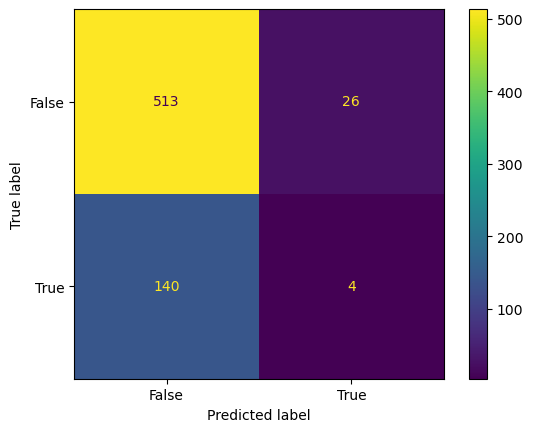

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier
1500
Accuracy: 0.7686676427525623
Precision: 0.26666666666666666
Recall (Sensitivity): 0.05555555555555555
Specificity: 0.9591836734693877
F1-Score: 0.09195402298850575


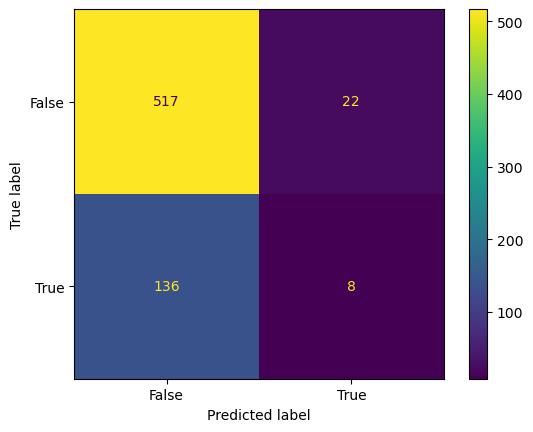

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier
2500
Accuracy: 0.7291361639824304
Precision: 0.18461538461538463
Recall (Sensitivity): 0.08333333333333333
Specificity: 0.9016697588126159
F1-Score: 0.11483253588516748


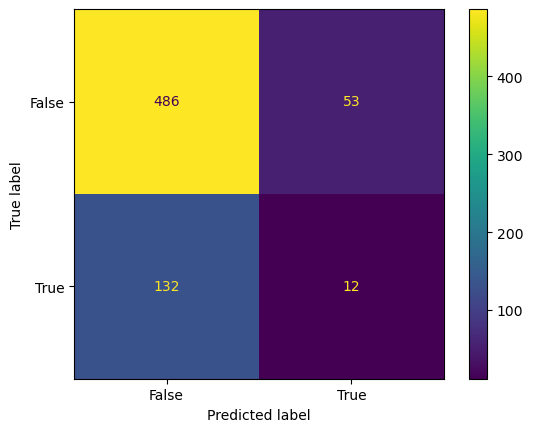

SVC
5
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


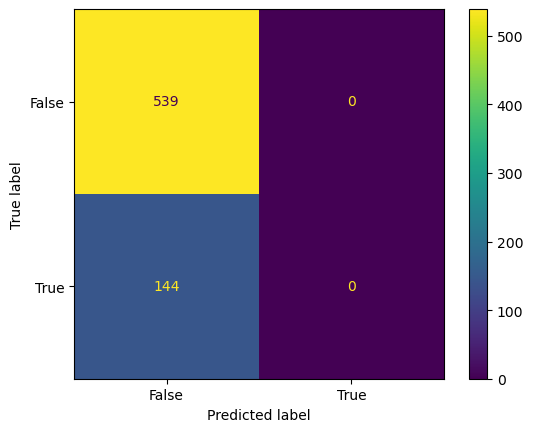

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC
20
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


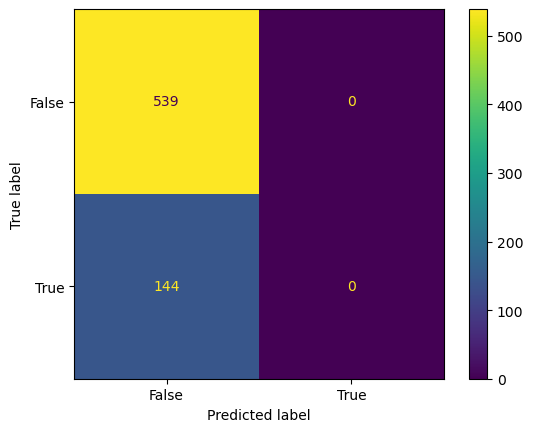

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC
100
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


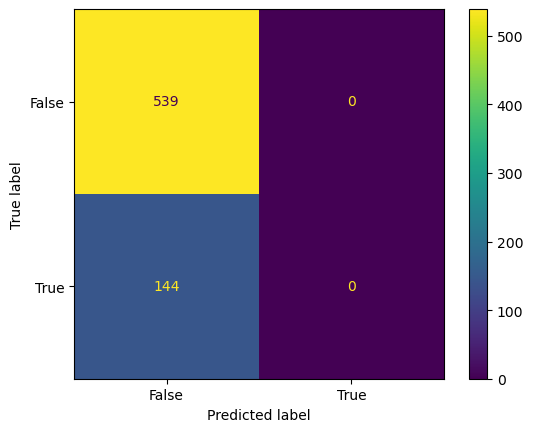

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC
200
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


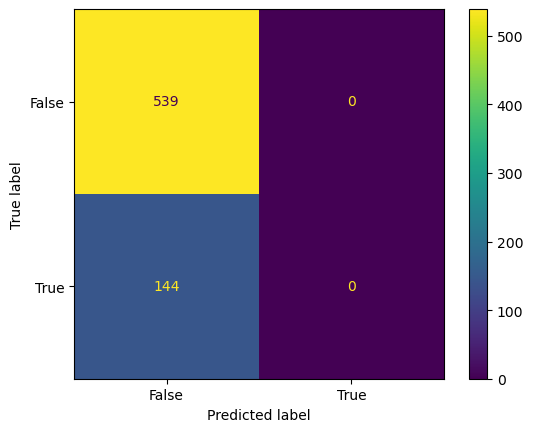

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC
500
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


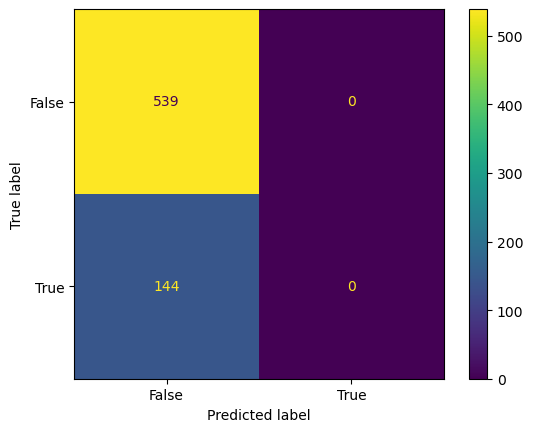

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC
1000
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


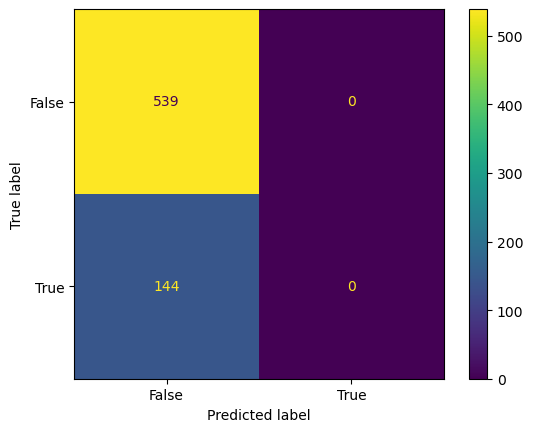

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC
1500
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


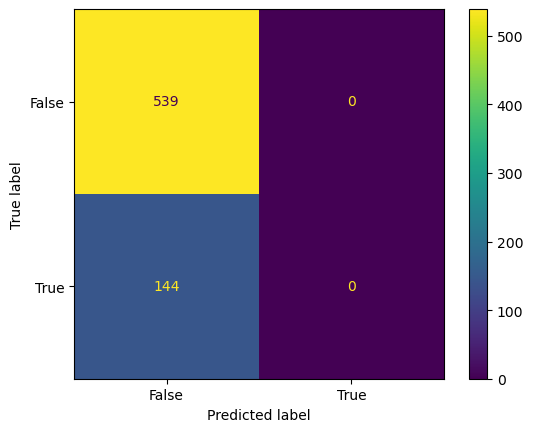

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC
2500
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


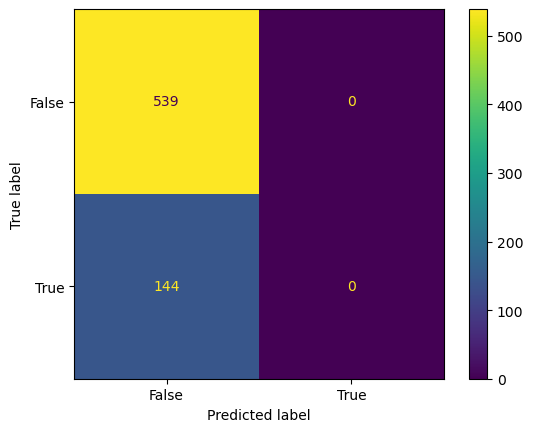

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForestClassifier
5
Accuracy: 0.7540263543191801
Precision: 0.2777777777777778
Recall (Sensitivity): 0.10416666666666667
Specificity: 0.9276437847866419
F1-Score: 0.15151515151515152


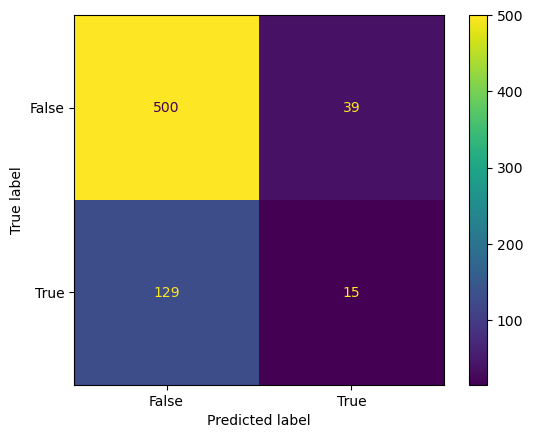

RandomForestClassifier
20
Accuracy: 0.7701317715959004
Precision: 0.25925925925925924
Recall (Sensitivity): 0.04861111111111111
Specificity: 0.9628942486085343
F1-Score: 0.08187134502923978


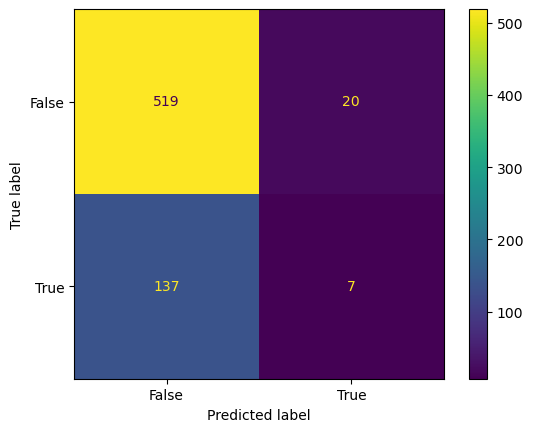

RandomForestClassifier
100
Accuracy: 0.780380673499268
Precision: 0.35
Recall (Sensitivity): 0.04861111111111111
Specificity: 0.9758812615955473
F1-Score: 0.08536585365853658


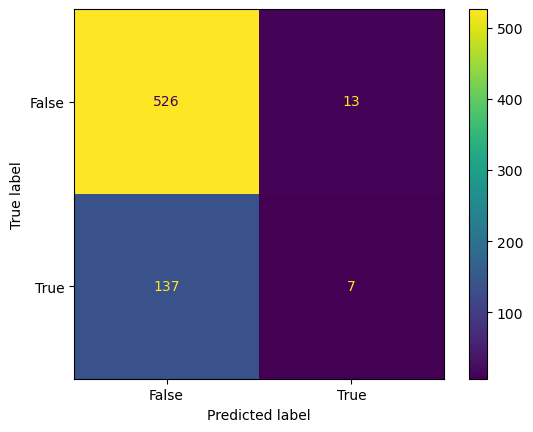

RandomForestClassifier
200
Accuracy: 0.7833089311859444
Precision: 0.35714285714285715
Recall (Sensitivity): 0.034722222222222224
Specificity: 0.9833024118738405
F1-Score: 0.06329113924050633


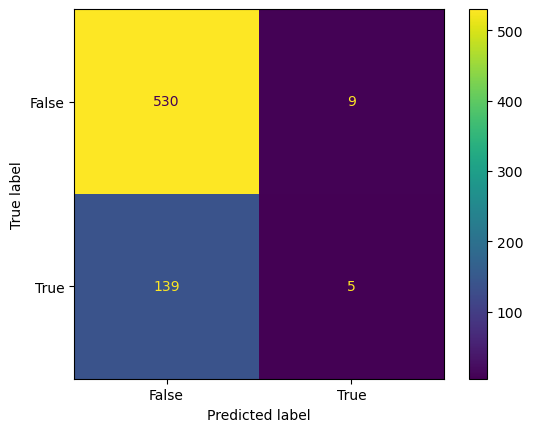

RandomForestClassifier
500
Accuracy: 0.7818448023426061
Precision: 0.3333333333333333
Recall (Sensitivity): 0.034722222222222224
Specificity: 0.9814471243042672
F1-Score: 0.06289308176100629


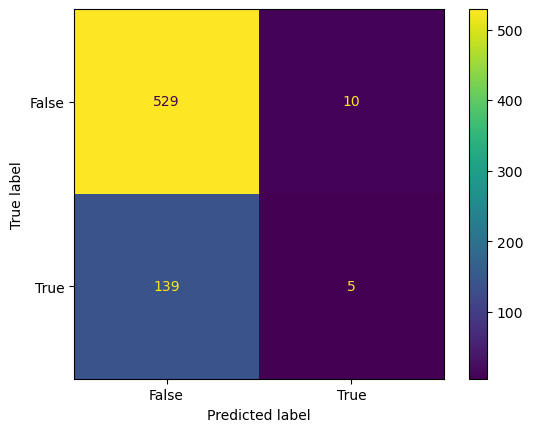

RandomForestClassifier
1000
Accuracy: 0.7847730600292826
Precision: 0.3333333333333333
Recall (Sensitivity): 0.020833333333333332
Specificity: 0.9888682745825603
F1-Score: 0.0392156862745098


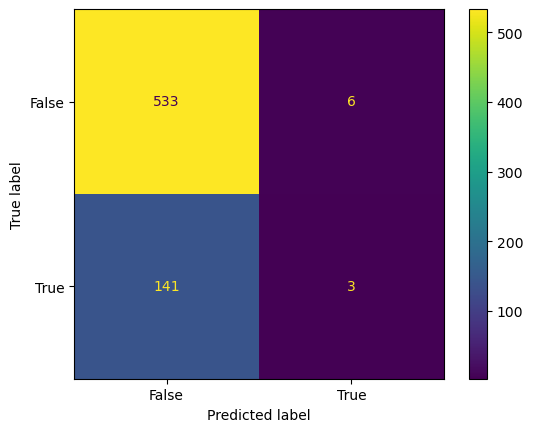

RandomForestClassifier
1500
Accuracy: 0.7774524158125915
Precision: 0.16666666666666666
Recall (Sensitivity): 0.013888888888888888
Specificity: 0.9814471243042672
F1-Score: 0.02564102564102564


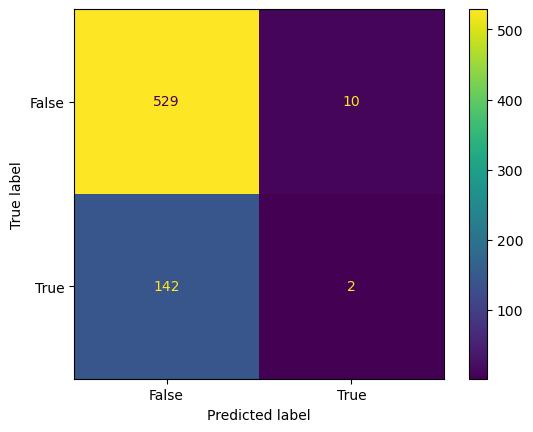

RandomForestClassifier
2500
Accuracy: 0.7789165446559297
Precision: 0.1111111111111111
Recall (Sensitivity): 0.006944444444444444
Specificity: 0.9851576994434137
F1-Score: 0.013071895424836602


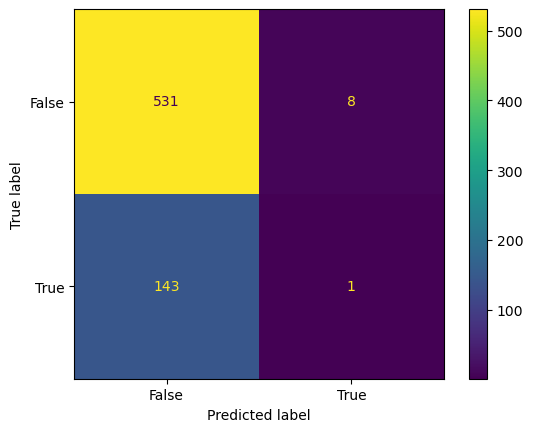

GradientBoostingClassifier
5
Accuracy: 0.7847730600292826
Precision: 0.4117647058823529
Recall (Sensitivity): 0.04861111111111111
Specificity: 0.9814471243042672
F1-Score: 0.08695652173913043


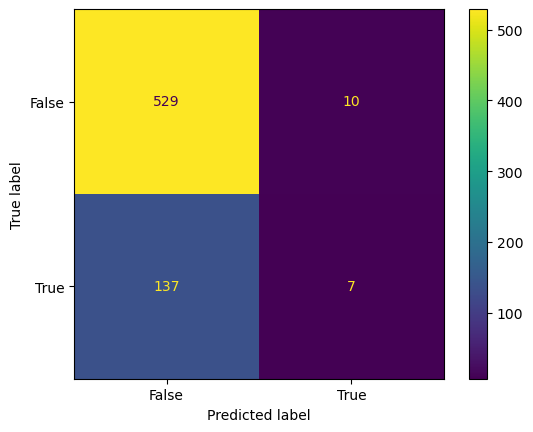

GradientBoostingClassifier
20
Accuracy: 0.7745241581259151
Precision: 0.3076923076923077
Recall (Sensitivity): 0.05555555555555555
Specificity: 0.9666048237476809
F1-Score: 0.09411764705882353


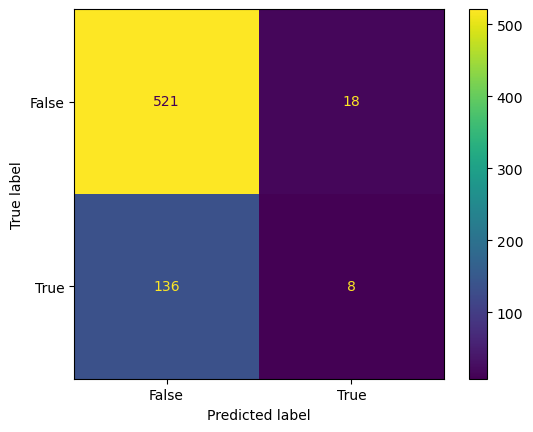

GradientBoostingClassifier
100
Accuracy: 0.7833089311859444
Precision: 0.35714285714285715
Recall (Sensitivity): 0.034722222222222224
Specificity: 0.9833024118738405
F1-Score: 0.06329113924050633


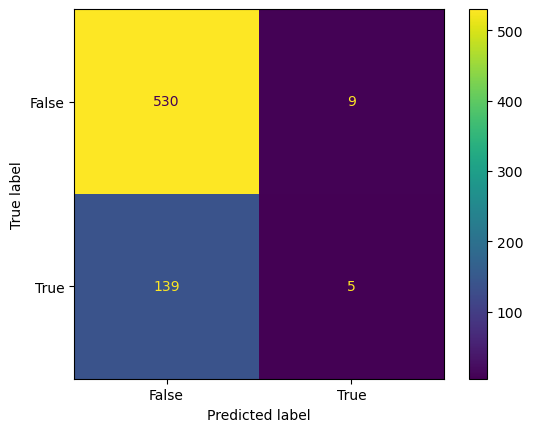

GradientBoostingClassifier
200
Accuracy: 0.7847730600292826
Precision: 0.36363636363636365
Recall (Sensitivity): 0.027777777777777776
Specificity: 0.987012987012987
F1-Score: 0.051612903225806445


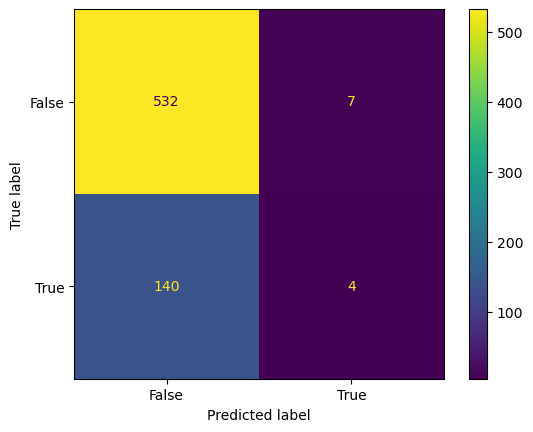

GradientBoostingClassifier
500
Accuracy: 0.7833089311859444
Precision: 0.3
Recall (Sensitivity): 0.020833333333333332
Specificity: 0.987012987012987
F1-Score: 0.03896103896103896


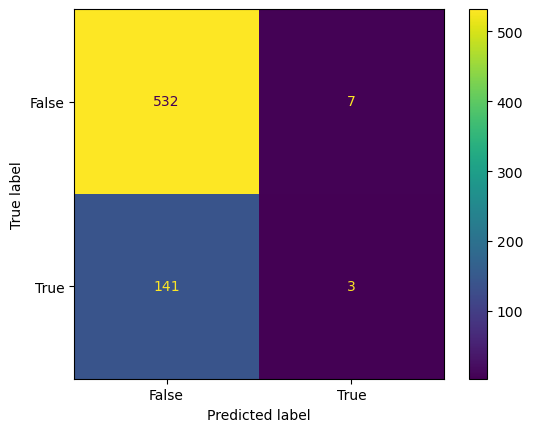

GradientBoostingClassifier
1000
Accuracy: 0.7833089311859444
Precision: 0.25
Recall (Sensitivity): 0.013888888888888888
Specificity: 0.9888682745825603
F1-Score: 0.02631578947368421


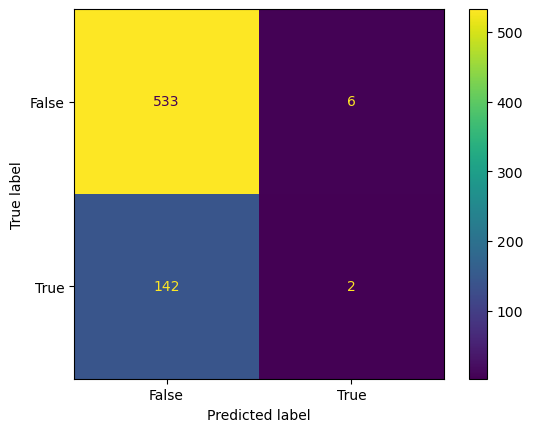

GradientBoostingClassifier
1500
Accuracy: 0.7847730600292826
Precision: 0.3333333333333333
Recall (Sensitivity): 0.020833333333333332
Specificity: 0.9888682745825603
F1-Score: 0.0392156862745098


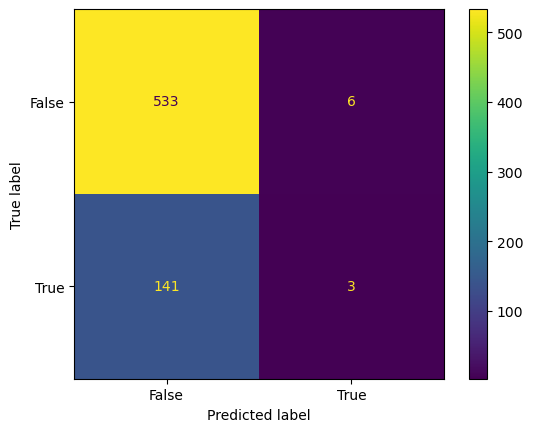

GradientBoostingClassifier
2500
Accuracy: 0.780380673499268
Precision: 0.2
Recall (Sensitivity): 0.013888888888888888
Specificity: 0.9851576994434137
F1-Score: 0.025974025974025972


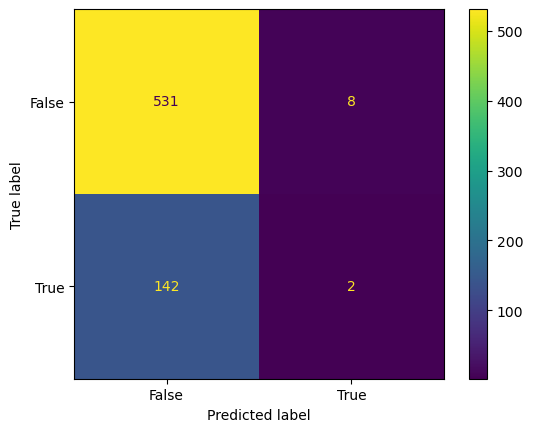

XGBClassifier
5
Accuracy: 0.7496339677891655
Precision: 0.32
Recall (Sensitivity): 0.16666666666666666
Specificity: 0.9053803339517625
F1-Score: 0.2191780821917808


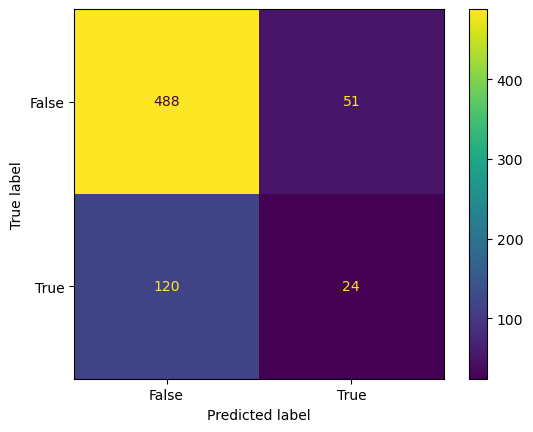

XGBClassifier
20
Accuracy: 0.7232796486090776
Precision: 0.2413793103448276
Recall (Sensitivity): 0.14583333333333334
Specificity: 0.8775510204081632
F1-Score: 0.18181818181818185


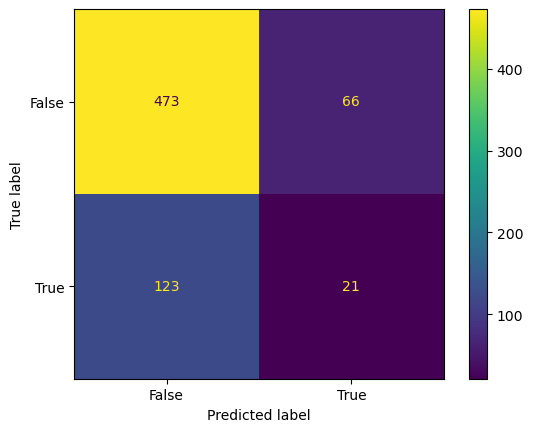

XGBClassifier
100
Accuracy: 0.7232796486090776
Precision: 0.2413793103448276
Recall (Sensitivity): 0.14583333333333334
Specificity: 0.8775510204081632
F1-Score: 0.18181818181818185


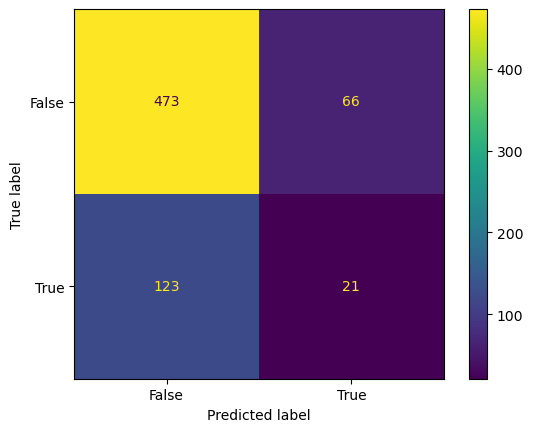

XGBClassifier
200
Accuracy: 0.7232796486090776
Precision: 0.2413793103448276
Recall (Sensitivity): 0.14583333333333334
Specificity: 0.8775510204081632
F1-Score: 0.18181818181818185


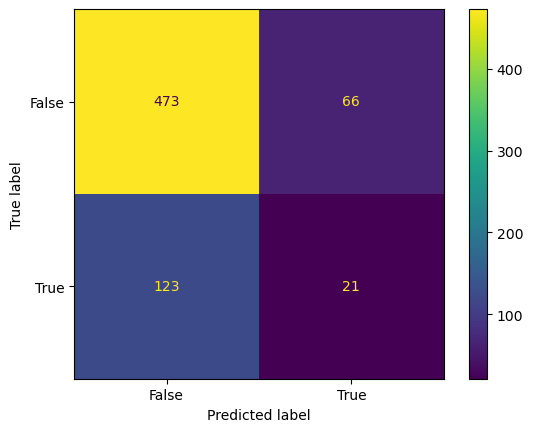

XGBClassifier
500
Accuracy: 0.7510980966325037
Precision: 0.3142857142857143
Recall (Sensitivity): 0.1527777777777778
Specificity: 0.9109461966604824
F1-Score: 0.20560747663551404


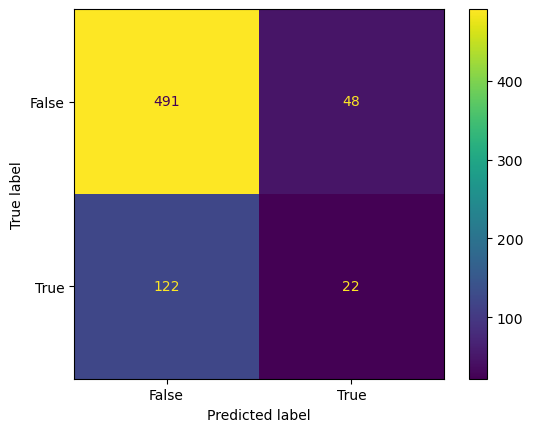

XGBClassifier
1000
Accuracy: 0.7510980966325037
Precision: 0.3142857142857143
Recall (Sensitivity): 0.1527777777777778
Specificity: 0.9109461966604824
F1-Score: 0.20560747663551404


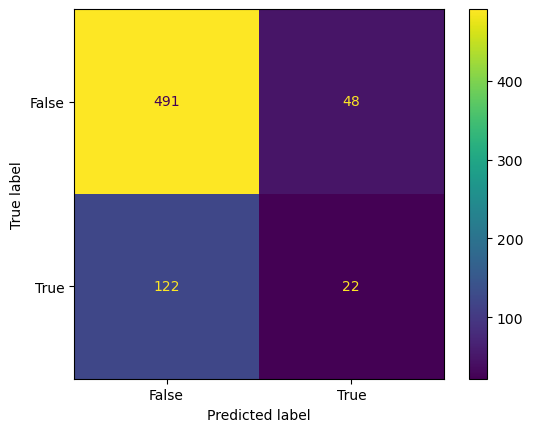

XGBClassifier
1500
Accuracy: 0.7510980966325037
Precision: 0.3142857142857143
Recall (Sensitivity): 0.1527777777777778
Specificity: 0.9109461966604824
F1-Score: 0.20560747663551404


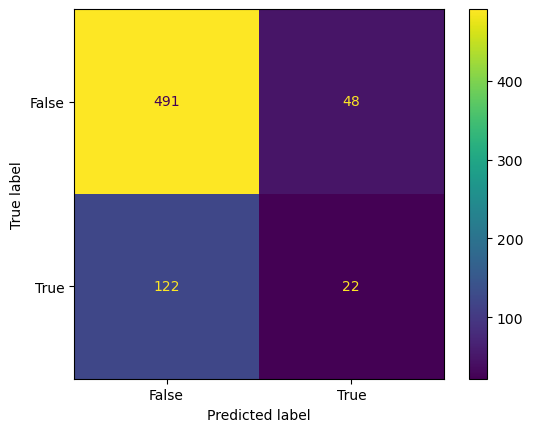

XGBClassifier
2500
Accuracy: 0.7423133235724744
Precision: 0.24193548387096775
Recall (Sensitivity): 0.10416666666666667
Specificity: 0.9128014842300557
F1-Score: 0.14563106796116504


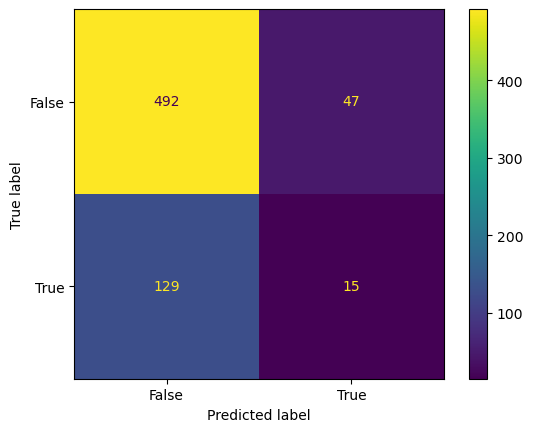

LogisticRegression
5
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


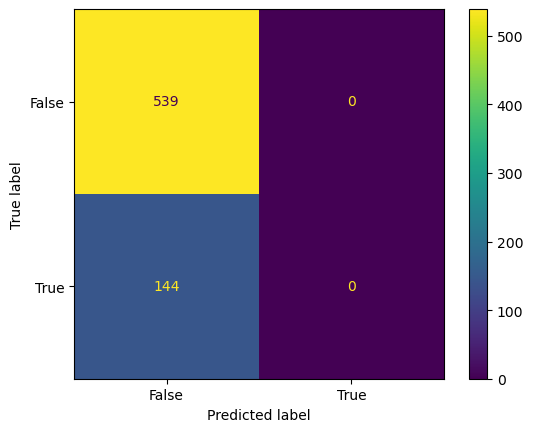

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression
20
Accuracy: 0.7789165446559297
Precision: 0.18181818181818182
Recall (Sensitivity): 0.013888888888888888
Specificity: 0.9833024118738405
F1-Score: 0.025806451612903222


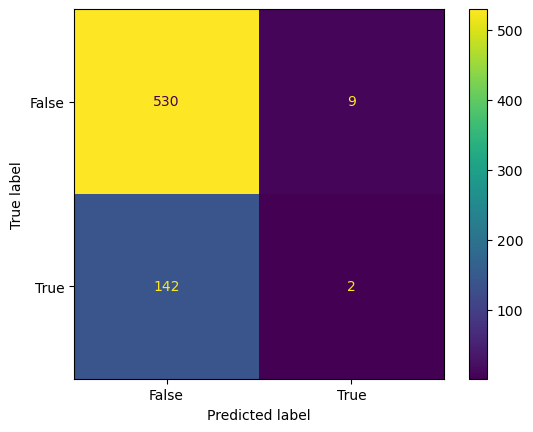

LogisticRegression
100
Accuracy: 0.7789165446559297
Precision: 0.26666666666666666
Recall (Sensitivity): 0.027777777777777776
Specificity: 0.9795918367346939
F1-Score: 0.05031446540880503


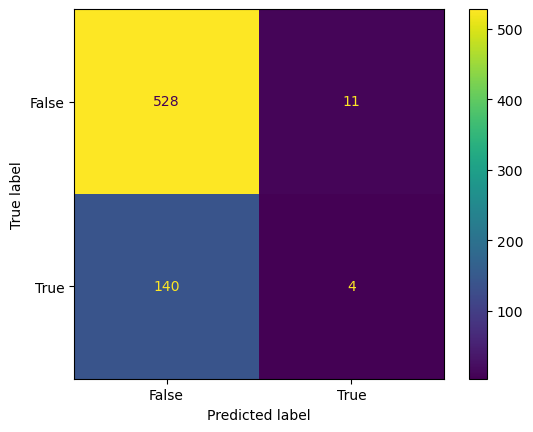

LogisticRegression
200
Accuracy: 0.7789165446559297
Precision: 0.26666666666666666
Recall (Sensitivity): 0.027777777777777776
Specificity: 0.9795918367346939
F1-Score: 0.05031446540880503


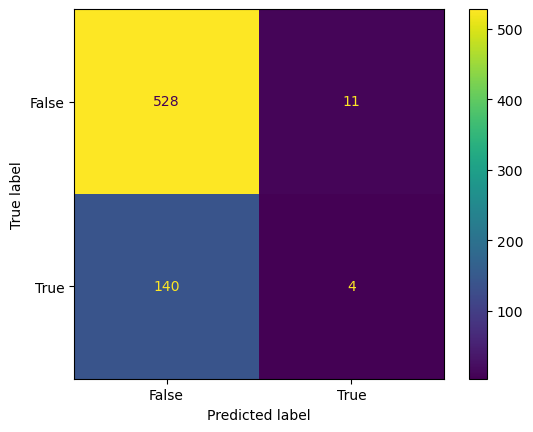

LogisticRegression
500
Accuracy: 0.780380673499268
Precision: 0.2857142857142857
Recall (Sensitivity): 0.027777777777777776
Specificity: 0.9814471243042672
F1-Score: 0.05063291139240506


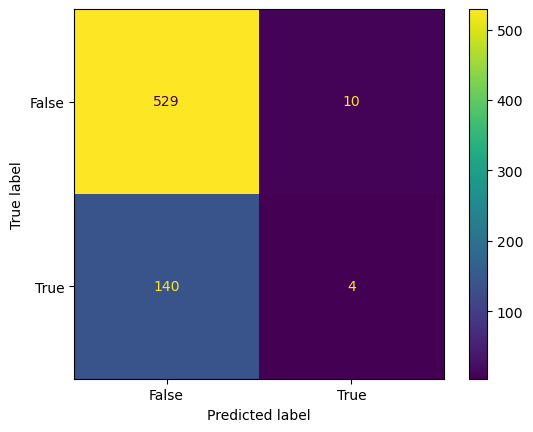

LogisticRegression
1000
Accuracy: 0.7833089311859444
Precision: 0.16666666666666666
Recall (Sensitivity): 0.006944444444444444
Specificity: 0.9907235621521335
F1-Score: 0.013333333333333332


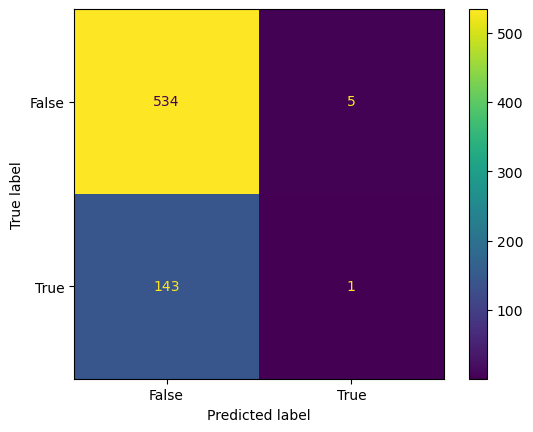

LogisticRegression
1500
Accuracy: 0.7847730600292826
Precision: 0.3333333333333333
Recall (Sensitivity): 0.020833333333333332
Specificity: 0.9888682745825603
F1-Score: 0.0392156862745098


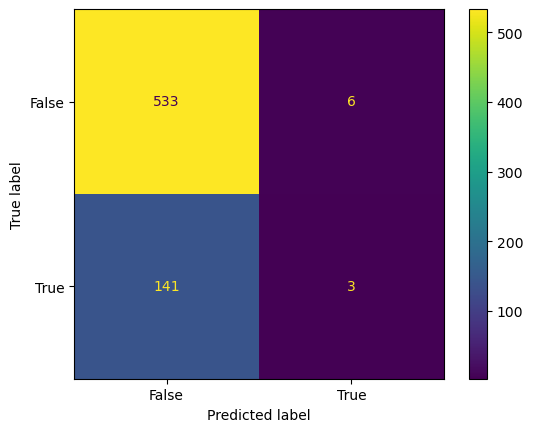

LogisticRegression
2500
Accuracy: 0.7833089311859444
Precision: 0.3333333333333333
Recall (Sensitivity): 0.027777777777777776
Specificity: 0.9851576994434137
F1-Score: 0.05128205128205128


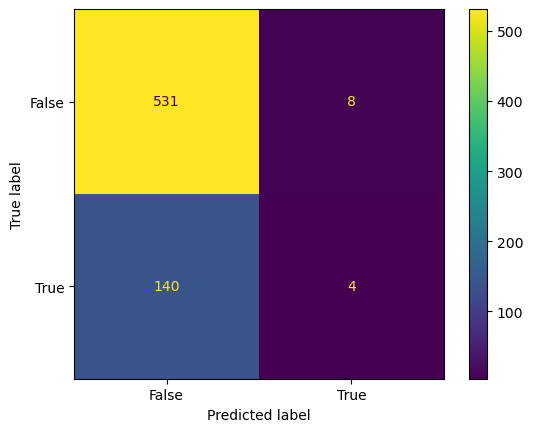

GaussianNB
5
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


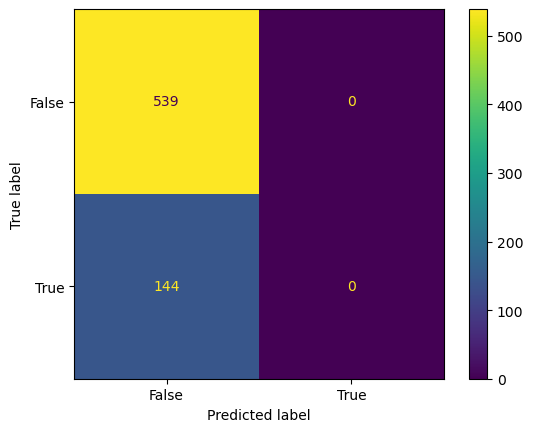

GaussianNB
20
Accuracy: 0.7789165446559297
Precision: 0.3157894736842105
Recall (Sensitivity): 0.041666666666666664
Specificity: 0.9758812615955473
F1-Score: 0.07361963190184048


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


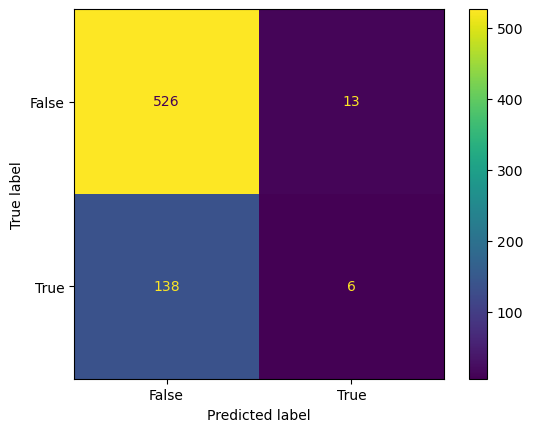

GaussianNB
100
Accuracy: 0.7862371888726208
Precision: 0.4
Recall (Sensitivity): 0.027777777777777776
Specificity: 0.9888682745825603
F1-Score: 0.051948051948051945


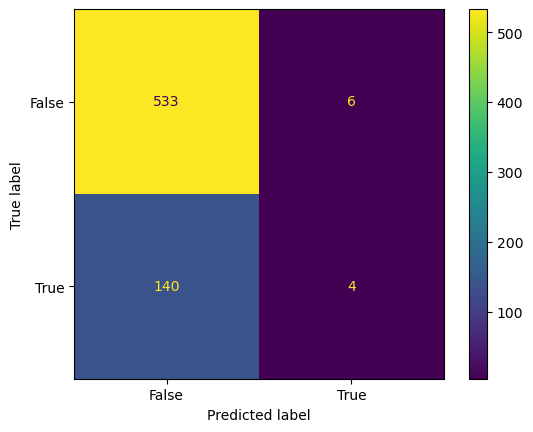

GaussianNB
200
Accuracy: 0.7862371888726208
Precision: 0.25
Recall (Sensitivity): 0.006944444444444444
Specificity: 0.9944341372912802
F1-Score: 0.013513513513513514


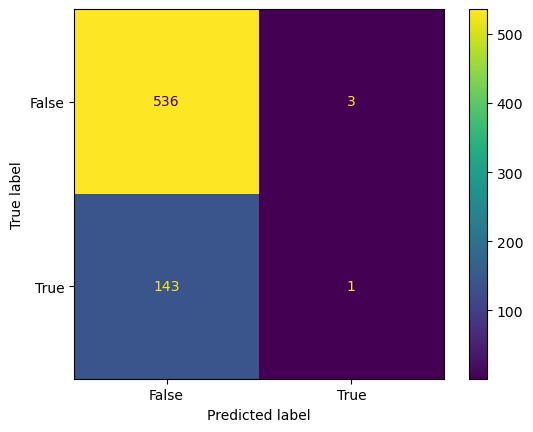

GaussianNB
500
Accuracy: 0.7906295754026355
Precision: 1.0
Recall (Sensitivity): 0.006944444444444444
Specificity: 1.0
F1-Score: 0.013793103448275862


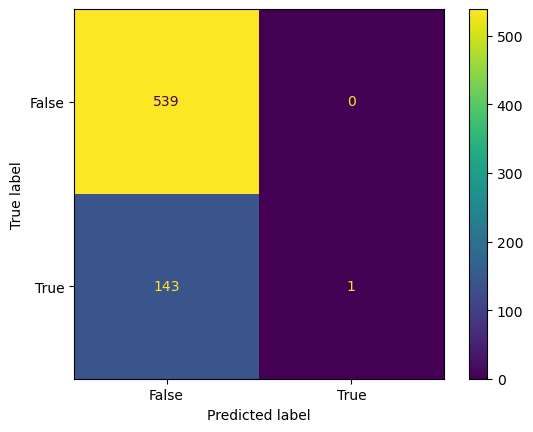

GaussianNB
1000
Accuracy: 0.7891654465592972
Precision: 0.5
Recall (Sensitivity): 0.006944444444444444
Specificity: 0.9981447124304267
F1-Score: 0.0136986301369863


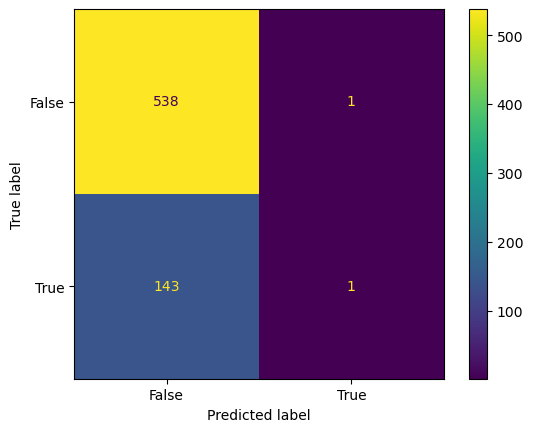

GaussianNB
1500
Accuracy: 0.7891654465592972
Precision: 0.5
Recall (Sensitivity): 0.006944444444444444
Specificity: 0.9981447124304267
F1-Score: 0.0136986301369863


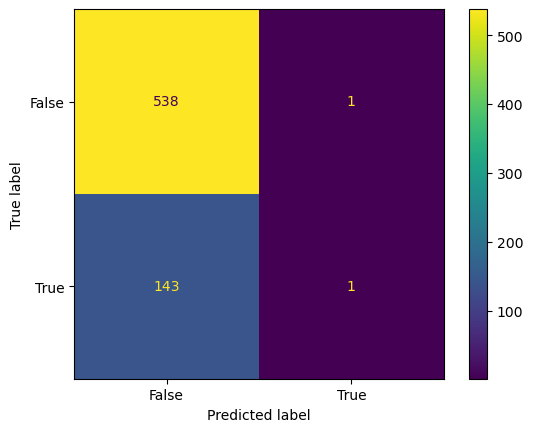

GaussianNB
2500
Accuracy: 0.2547584187408492
Precision: 0.21350078492935637
Recall (Sensitivity): 0.9444444444444444
Specificity: 0.07050092764378478
F1-Score: 0.34827144686299616


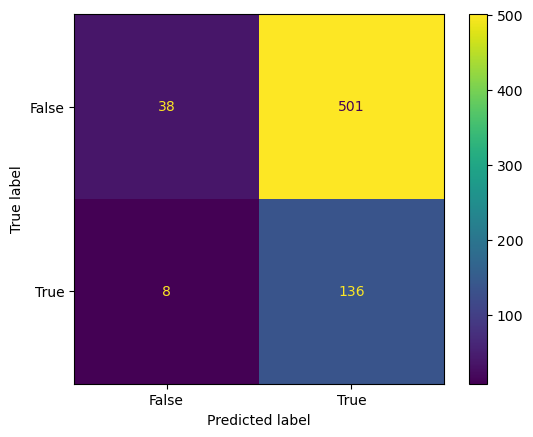

DecisionTreeClassifier
5
Accuracy: 0.6383601756954612
Precision: 0.18404907975460122
Recall (Sensitivity): 0.20833333333333334
Specificity: 0.7532467532467533
F1-Score: 0.19543973941368079


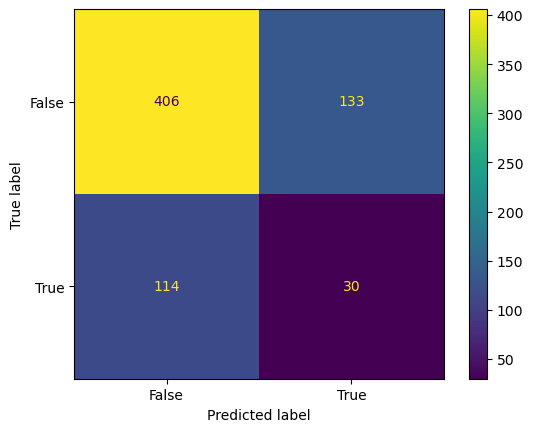

DecisionTreeClassifier
20
Accuracy: 0.6617862371888726
Precision: 0.2569832402234637
Recall (Sensitivity): 0.3194444444444444
Specificity: 0.7532467532467533
F1-Score: 0.28482972136222906


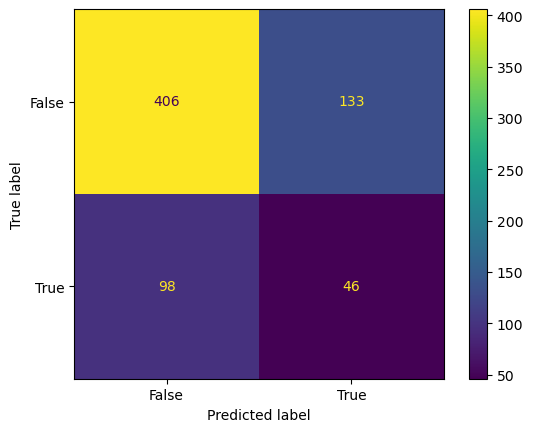

DecisionTreeClassifier
100
Accuracy: 0.6412884333821376
Precision: 0.2436548223350254
Recall (Sensitivity): 0.3333333333333333
Specificity: 0.7235621521335807
F1-Score: 0.281524926686217


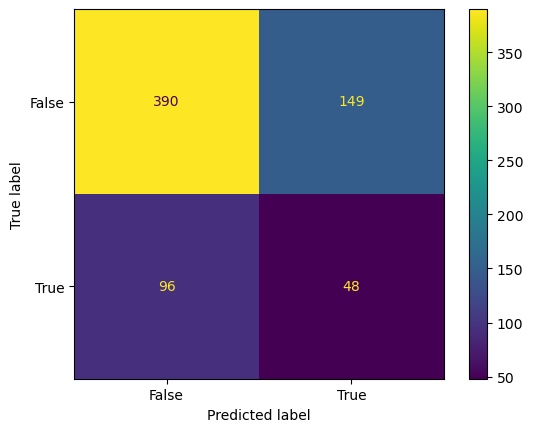

DecisionTreeClassifier
200
Accuracy: 0.6544655929721815
Precision: 0.23563218390804597
Recall (Sensitivity): 0.2847222222222222
Specificity: 0.7532467532467533
F1-Score: 0.25786163522012573


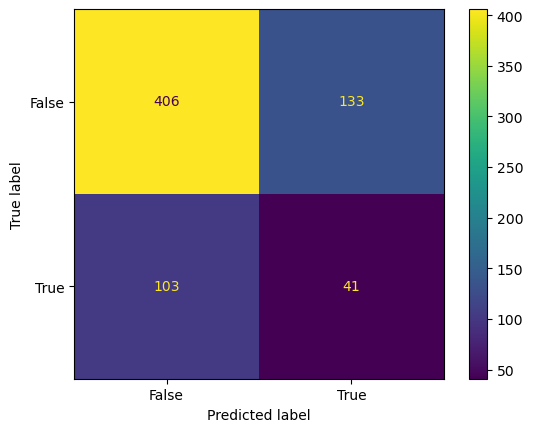

DecisionTreeClassifier
500
Accuracy: 0.7101024890190337
Precision: 0.2631578947368421
Recall (Sensitivity): 0.20833333333333334
Specificity: 0.8441558441558441
F1-Score: 0.23255813953488372


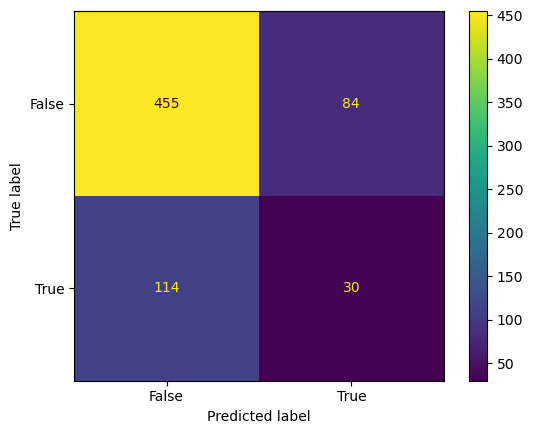

DecisionTreeClassifier
1000
Accuracy: 0.6939970717423133
Precision: 0.21739130434782608
Recall (Sensitivity): 0.1736111111111111
Specificity: 0.8330241187384044
F1-Score: 0.19305019305019305


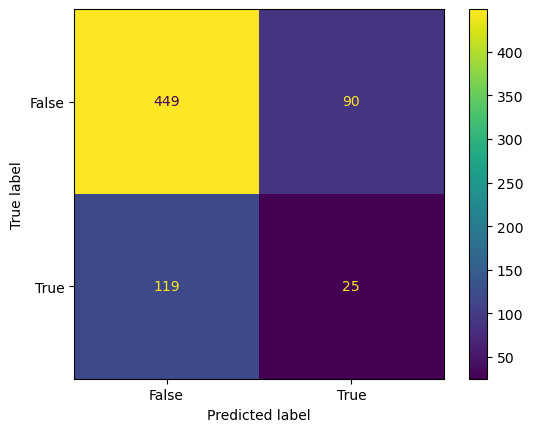

DecisionTreeClassifier
1500
Accuracy: 0.6896046852122987
Precision: 0.20175438596491227
Recall (Sensitivity): 0.1597222222222222
Specificity: 0.8311688311688312
F1-Score: 0.17829457364341084


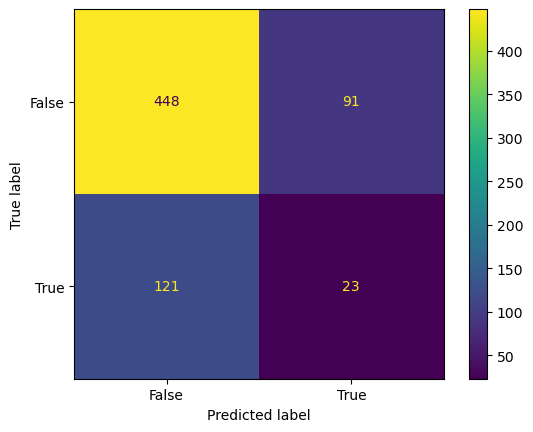

DecisionTreeClassifier
2500
Accuracy: 0.6969253294289898
Precision: 0.21621621621621623
Recall (Sensitivity): 0.16666666666666666
Specificity: 0.8385899814471243
F1-Score: 0.18823529411764706


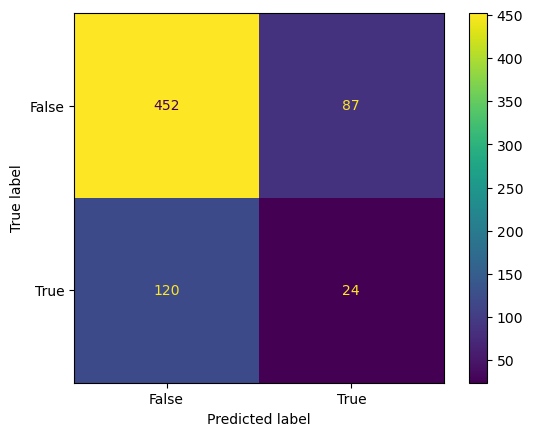

KNeighborsClassifier
5
Accuracy: 0.7291361639824304
Precision: 0.18461538461538463
Recall (Sensitivity): 0.08333333333333333
Specificity: 0.9016697588126159
F1-Score: 0.11483253588516748


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


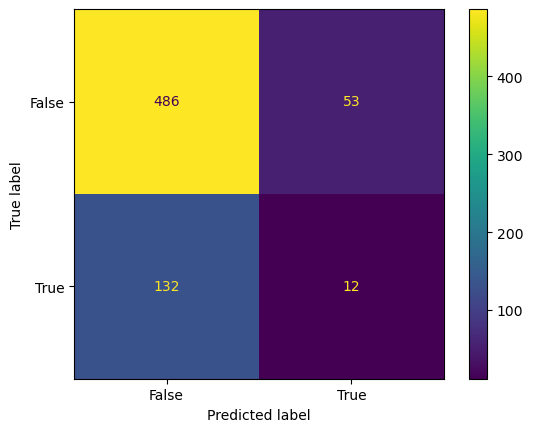

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier
20
Accuracy: 0.7203513909224012
Precision: 0.18666666666666668
Recall (Sensitivity): 0.09722222222222222
Specificity: 0.8868274582560297
F1-Score: 0.1278538812785388


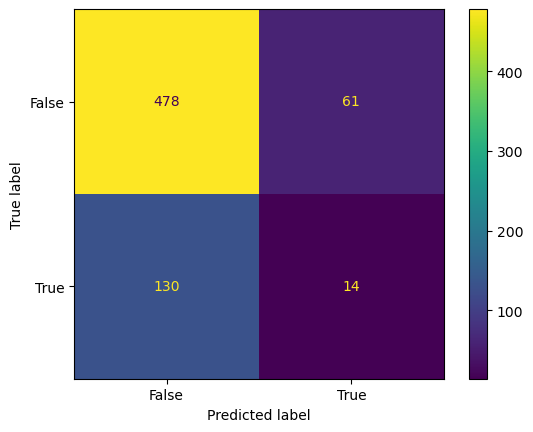

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier
100
Accuracy: 0.7276720351390923
Precision: 0.18181818181818182
Recall (Sensitivity): 0.08333333333333333
Specificity: 0.8998144712430427
F1-Score: 0.1142857142857143


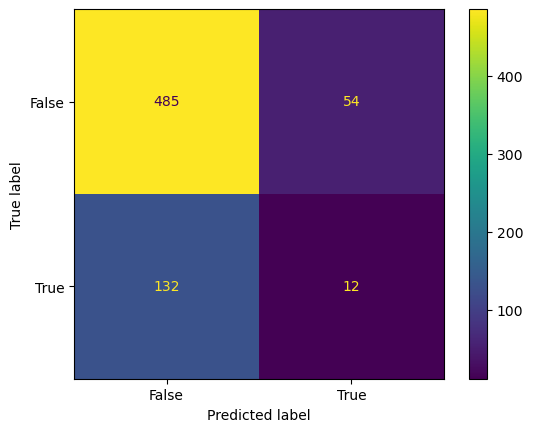

KNeighborsClassifier
200
Accuracy: 0.7554904831625183
Precision: 0.21951219512195122
Recall (Sensitivity): 0.0625
Specificity: 0.9406307977736549
F1-Score: 0.0972972972972973


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


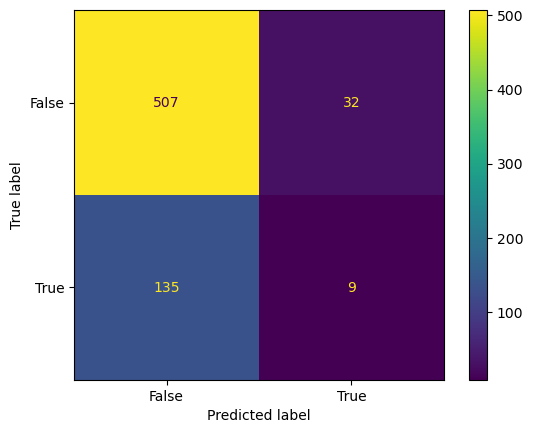

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier
500
Accuracy: 0.7730600292825769
Precision: 0.07692307692307693
Recall (Sensitivity): 0.006944444444444444
Specificity: 0.9777365491651205
F1-Score: 0.012738853503184714


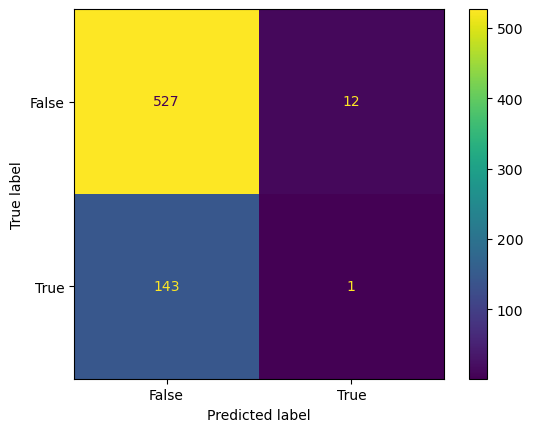

KNeighborsClassifier
1000
Accuracy: 0.7862371888726208
Precision: 0.25
Recall (Sensitivity): 0.006944444444444444
Specificity: 0.9944341372912802
F1-Score: 0.013513513513513514


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


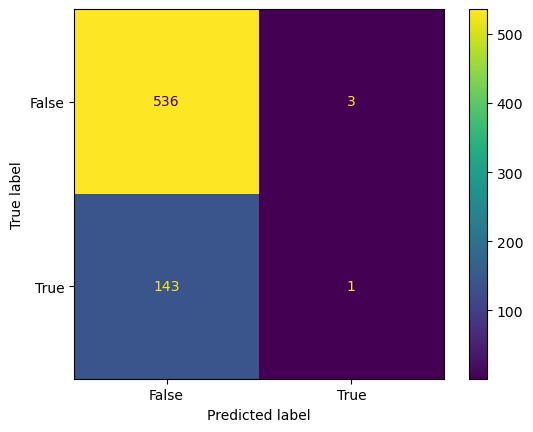

KNeighborsClassifier
1500
Accuracy: 0.7847730600292826
Precision: 0.2
Recall (Sensitivity): 0.006944444444444444
Specificity: 0.9925788497217068
F1-Score: 0.013422818791946308


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


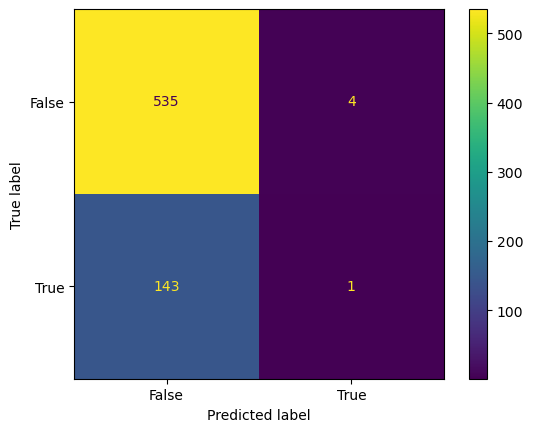

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier
2500
Accuracy: 0.7730600292825769
Precision: 0.13333333333333333
Recall (Sensitivity): 0.013888888888888888
Specificity: 0.9758812615955473
F1-Score: 0.025157232704402514


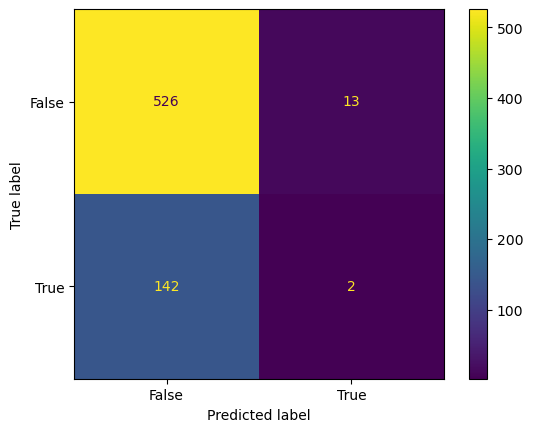

SVC
5
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


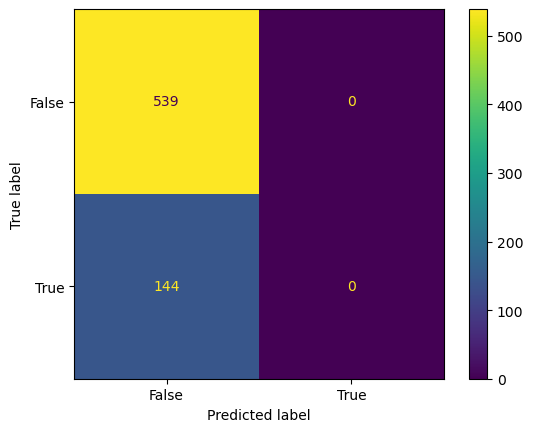

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC
20
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


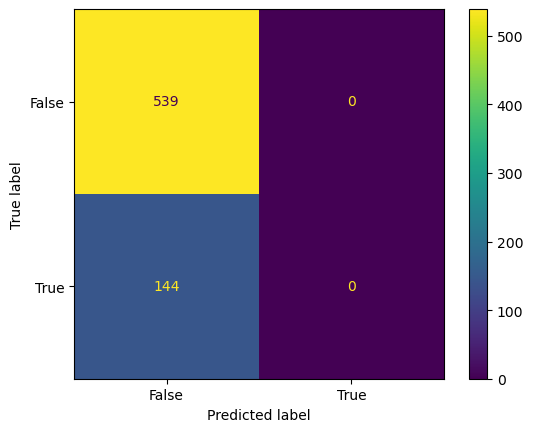

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC
100
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


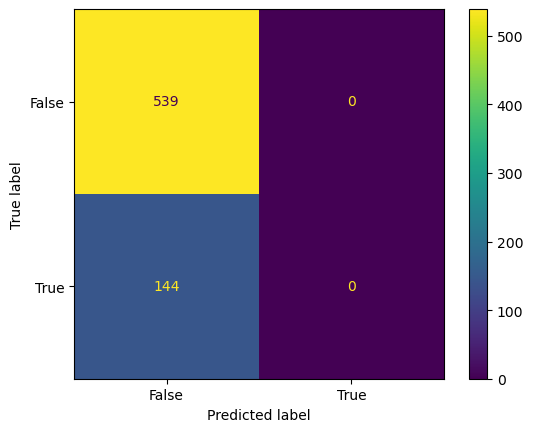

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC
200
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


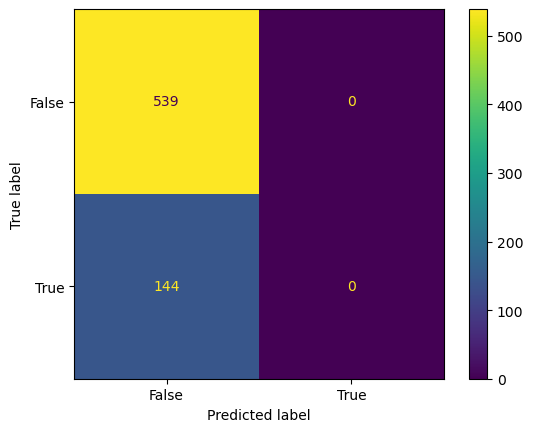

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC
500
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


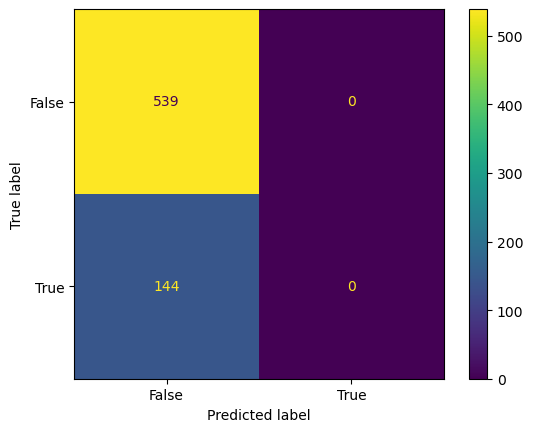

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC
1000
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


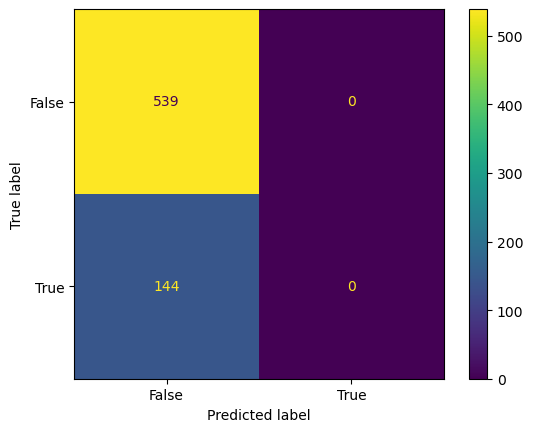

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC
1500
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


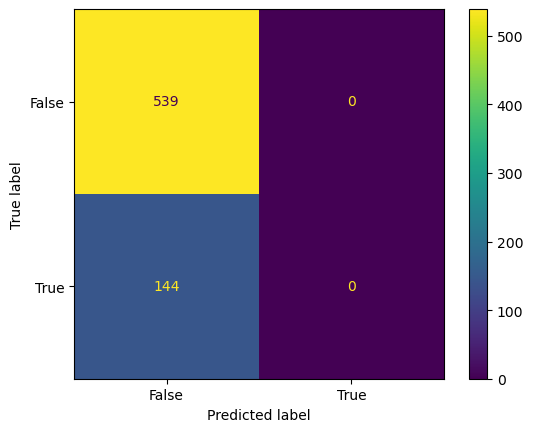

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC
2500
Accuracy: 0.7891654465592972
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


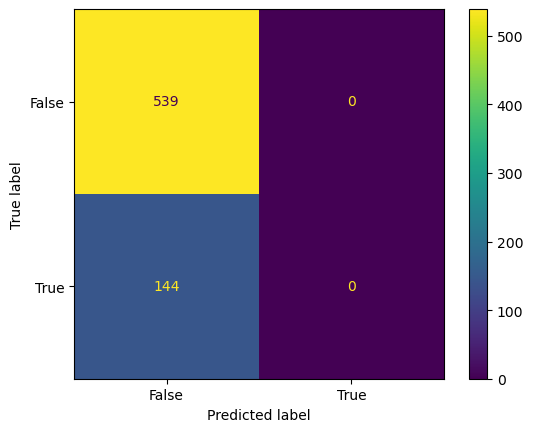

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForestClassifier
5
Accuracy: 0.7715959004392386
Precision: 0.25
Recall (Sensitivity): 0.041666666666666664
Specificity: 0.9666048237476809
F1-Score: 0.07142857142857142


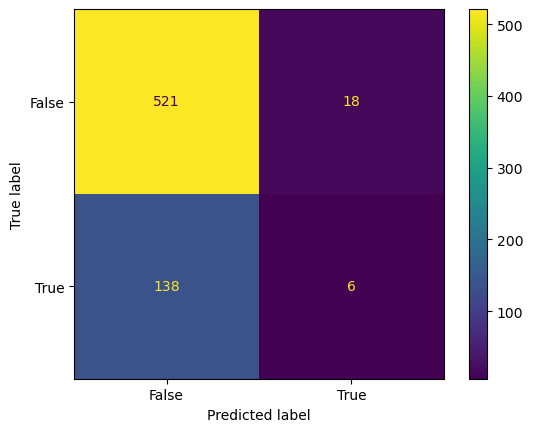

RandomForestClassifier
20
Accuracy: 0.7759882869692533
Precision: 0.2
Recall (Sensitivity): 0.020833333333333332
Specificity: 0.9777365491651205
F1-Score: 0.03773584905660377


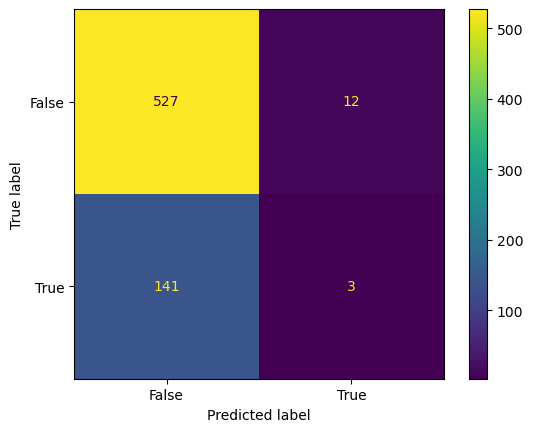

RandomForestClassifier
100
Accuracy: 0.7818448023426061
Precision: 0.3076923076923077
Recall (Sensitivity): 0.027777777777777776
Specificity: 0.9833024118738405
F1-Score: 0.050955414012738856


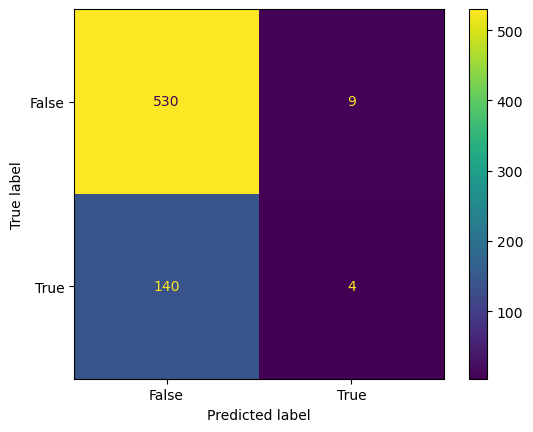

RandomForestClassifier
200
Accuracy: 0.780380673499268
Precision: 0.2
Recall (Sensitivity): 0.013888888888888888
Specificity: 0.9851576994434137
F1-Score: 0.025974025974025972


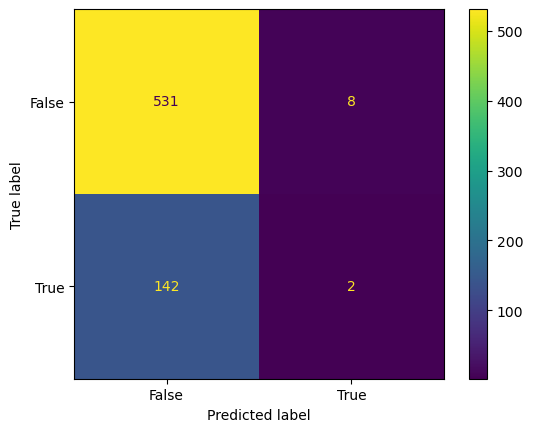

RandomForestClassifier
500
Accuracy: 0.7862371888726208
Precision: 0.25
Recall (Sensitivity): 0.006944444444444444
Specificity: 0.9944341372912802
F1-Score: 0.013513513513513514


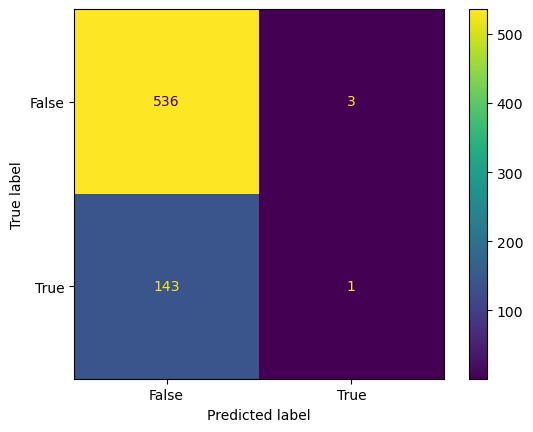

RandomForestClassifier
1000
Accuracy: 0.7891654465592972
Precision: 0.5
Recall (Sensitivity): 0.006944444444444444
Specificity: 0.9981447124304267
F1-Score: 0.0136986301369863


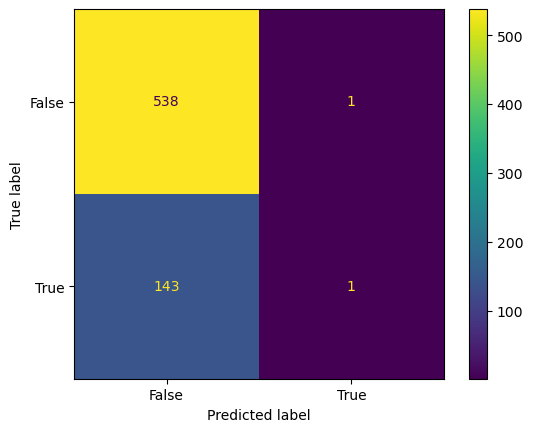

RandomForestClassifier
1500
Accuracy: 0.787701317715959
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 0.9981447124304267
F1-Score: 0.0


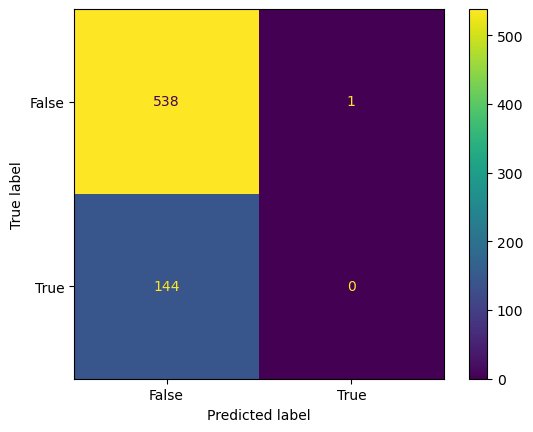

RandomForestClassifier
2500
Accuracy: 0.7906295754026355
Precision: 1.0
Recall (Sensitivity): 0.006944444444444444
Specificity: 1.0
F1-Score: 0.013793103448275862


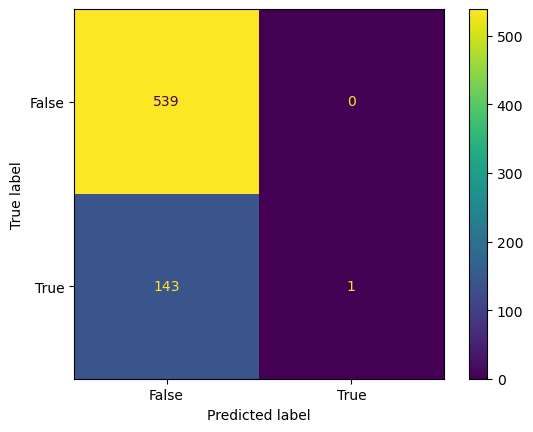

GradientBoostingClassifier
5
Accuracy: 0.780380673499268
Precision: 0.3333333333333333
Recall (Sensitivity): 0.041666666666666664
Specificity: 0.9777365491651205
F1-Score: 0.07407407407407407


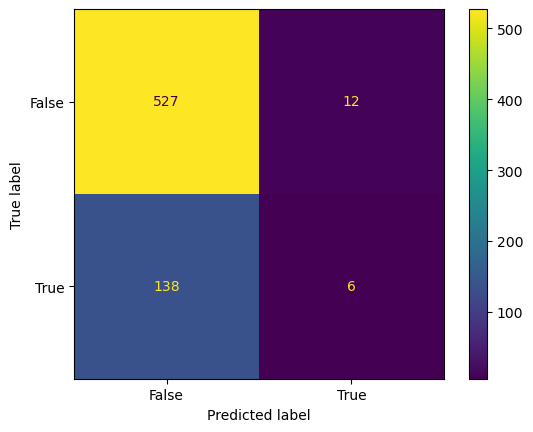

GradientBoostingClassifier
20
Accuracy: 0.7818448023426061
Precision: 0.391304347826087
Recall (Sensitivity): 0.0625
Specificity: 0.974025974025974
F1-Score: 0.10778443113772455


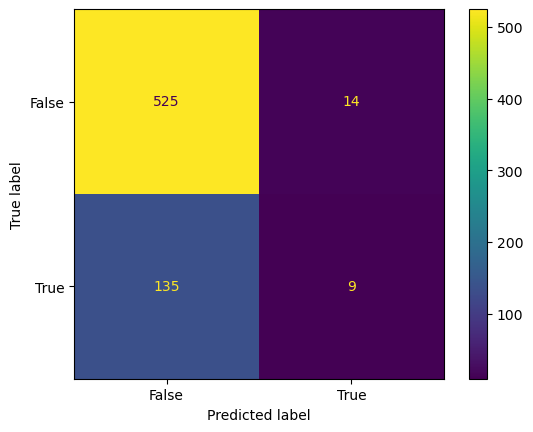

GradientBoostingClassifier
100
Accuracy: 0.780380673499268
Precision: 0.3125
Recall (Sensitivity): 0.034722222222222224
Specificity: 0.9795918367346939
F1-Score: 0.0625


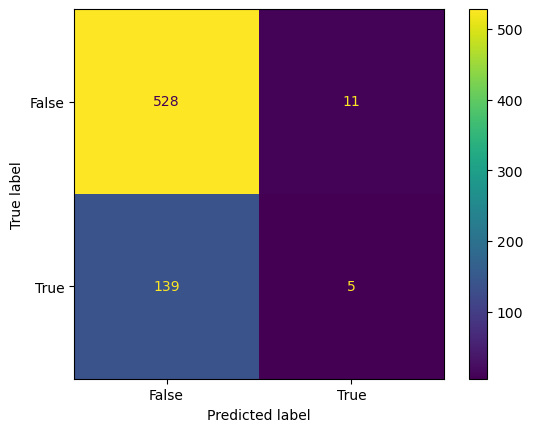

GradientBoostingClassifier
200
Accuracy: 0.7818448023426061
Precision: 0.2727272727272727
Recall (Sensitivity): 0.020833333333333332
Specificity: 0.9851576994434137
F1-Score: 0.03870967741935484


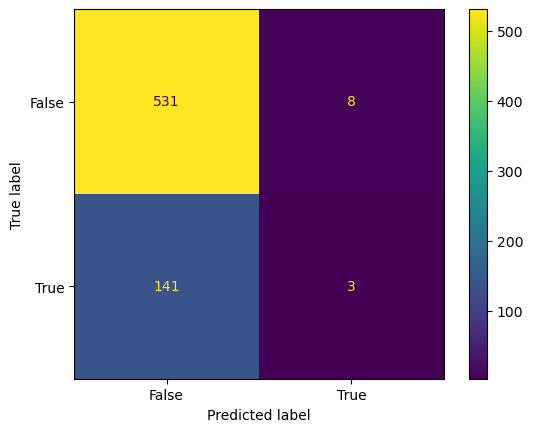

GradientBoostingClassifier
500
Accuracy: 0.7847730600292826
Precision: 0.2857142857142857
Recall (Sensitivity): 0.013888888888888888
Specificity: 0.9907235621521335
F1-Score: 0.026490066225165563


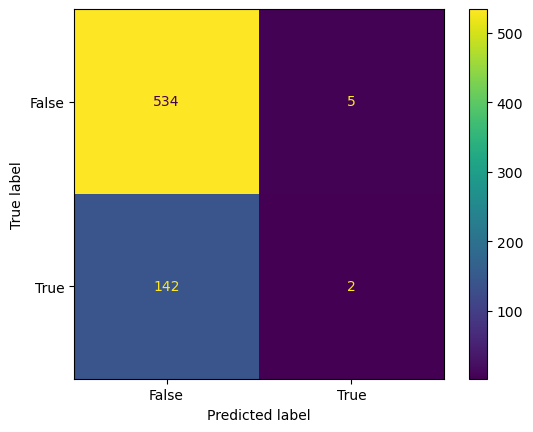

GradientBoostingClassifier
1000
Accuracy: 0.7833089311859444
Precision: 0.25
Recall (Sensitivity): 0.013888888888888888
Specificity: 0.9888682745825603
F1-Score: 0.02631578947368421


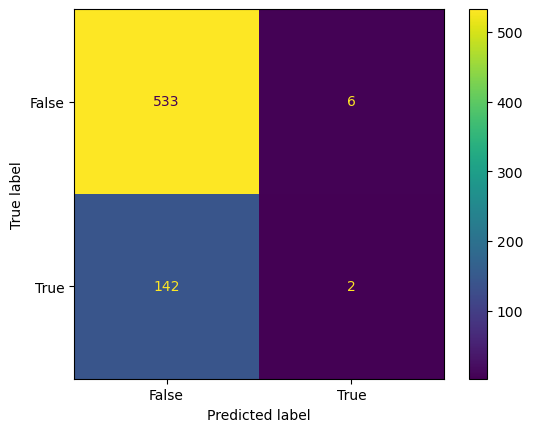

GradientBoostingClassifier
1500
Accuracy: 0.780380673499268
Precision: 0.2
Recall (Sensitivity): 0.013888888888888888
Specificity: 0.9851576994434137
F1-Score: 0.025974025974025972


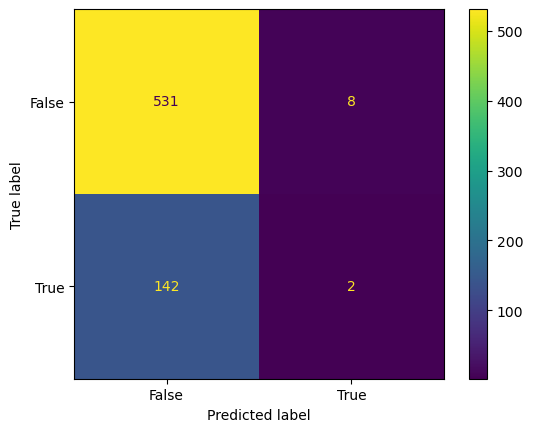

GradientBoostingClassifier
2500
Accuracy: 0.7818448023426061
Precision: 0.2222222222222222
Recall (Sensitivity): 0.013888888888888888
Specificity: 0.987012987012987
F1-Score: 0.026143790849673203


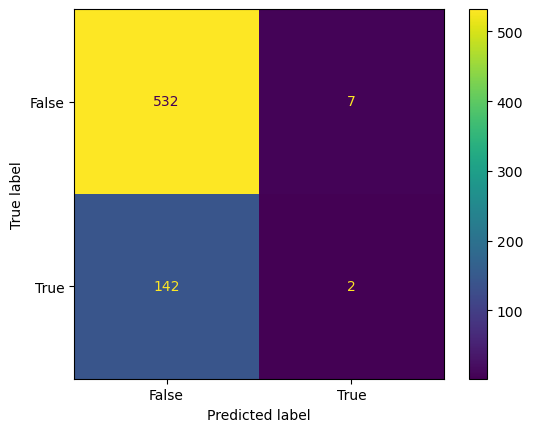

XGBClassifier
5
Accuracy: 0.739385065885798
Precision: 0.2638888888888889
Recall (Sensitivity): 0.13194444444444445
Specificity: 0.9016697588126159
F1-Score: 0.17592592592592593


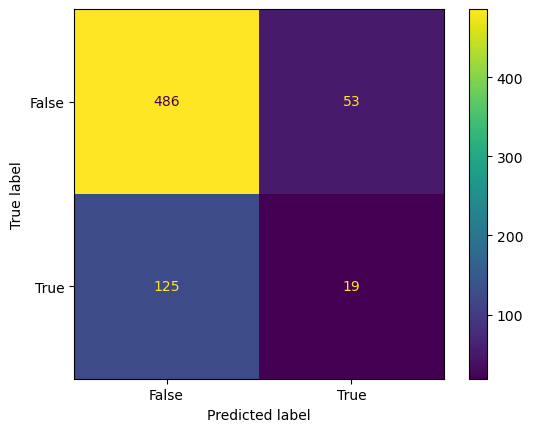

XGBClassifier
20
Accuracy: 0.7276720351390923
Precision: 0.21621621621621623
Recall (Sensitivity): 0.1111111111111111
Specificity: 0.8923933209647495
F1-Score: 0.14678899082568808


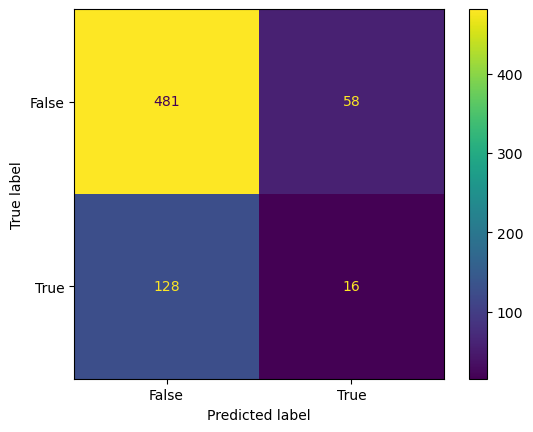

XGBClassifier
100
Accuracy: 0.7291361639824304
Precision: 0.2191780821917808
Recall (Sensitivity): 0.1111111111111111
Specificity: 0.8942486085343229
F1-Score: 0.14746543778801843


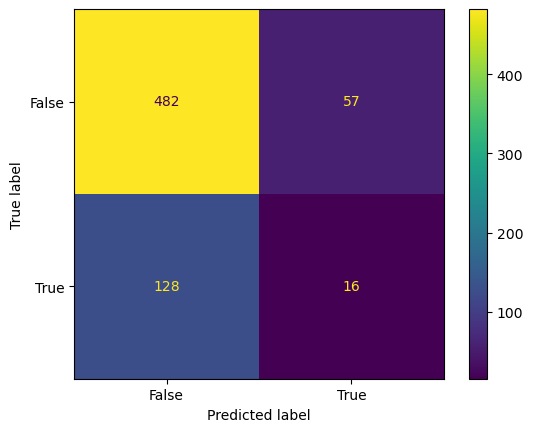

XGBClassifier
200
Accuracy: 0.726207906295754
Precision: 0.22077922077922077
Recall (Sensitivity): 0.11805555555555555
Specificity: 0.8886827458256029
F1-Score: 0.15384615384615385


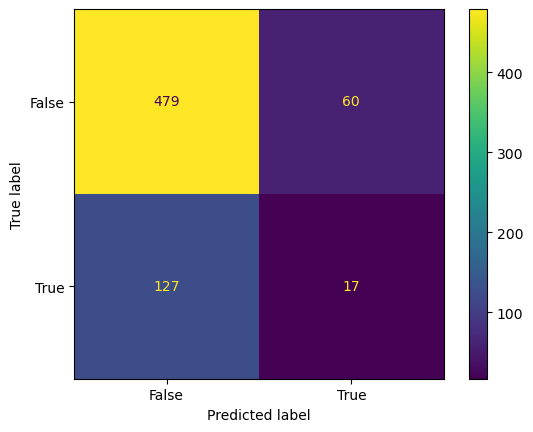

XGBClassifier
500
Accuracy: 0.7408491947291361
Precision: 0.22950819672131148
Recall (Sensitivity): 0.09722222222222222
Specificity: 0.9128014842300557
F1-Score: 0.13658536585365852


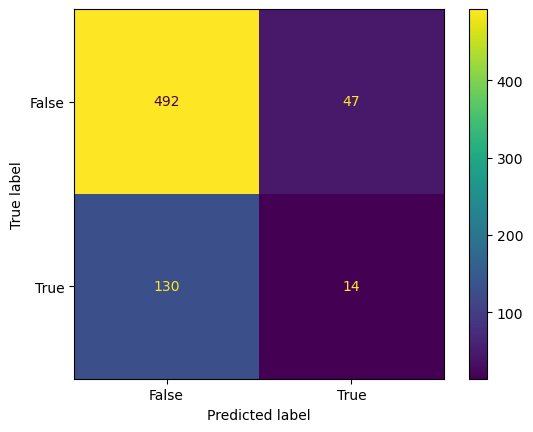

XGBClassifier
1000
Accuracy: 0.7320644216691069
Precision: 0.2
Recall (Sensitivity): 0.09027777777777778
Specificity: 0.9035250463821892
F1-Score: 0.12440191387559808


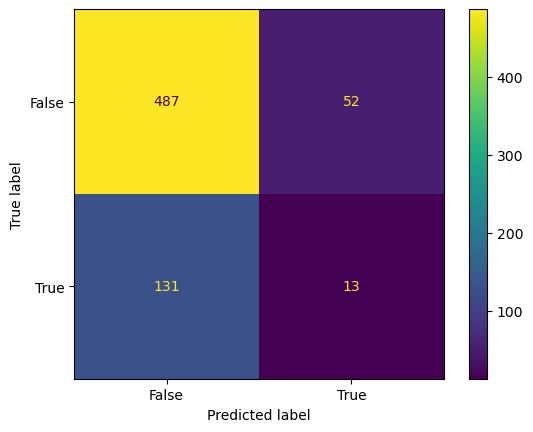

XGBClassifier
1500
Accuracy: 0.726207906295754
Precision: 0.2054794520547945
Recall (Sensitivity): 0.10416666666666667
Specificity: 0.8923933209647495
F1-Score: 0.13824884792626727


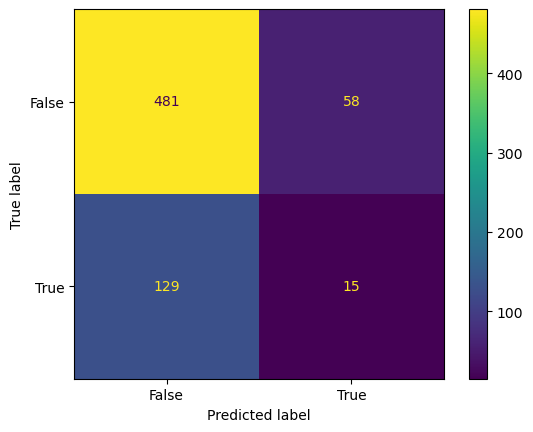

XGBClassifier
2500
Accuracy: 0.726207906295754
Precision: 0.2054794520547945
Recall (Sensitivity): 0.10416666666666667
Specificity: 0.8923933209647495
F1-Score: 0.13824884792626727


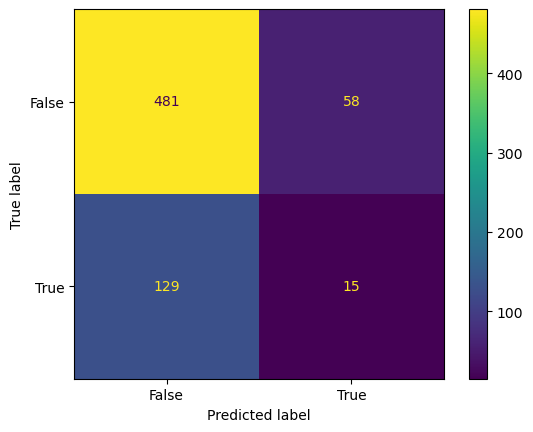

In [85]:
for fi_model in ['Gradient Boosting', 'Random Forest']:
    for model_name, model in models.items():
        for i in [5, 20, 100, 200, 500, 1000, 1500, 2500]:
            X_features = X[:,feature_importance_rf_gb[feature_importance_rf_gb['model']== fi_model].head(i)['feature_no'].to_list()]
            X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=28)
            X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=28)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)
            print(model_name)
            print(i)
            scores(y_val, y_pred)
            confusion_matrix_(y_val,y_pred)
            
            cm = confusion_matrix(y_val, y_pred)
            tn, fp, fn, tp = cm.ravel()
            accuracy = accuracy_score(y_val, y_pred)
            precision = precision_score(y_val, y_pred)
            recall = recall_score(y_val, y_pred)
            specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
            f1 = f1_score(y_val, y_pred)
            
            results['Model'].append(model_name)
            results['Accuracy'].append(accuracy)
            results['Precision'].append(precision)
            results['Recall'].append(recall)
            results['Specificity'].append(specificity)
            results['F1 Score'].append(f1)
            results['n_features'].append(i)
            results['fp'].append(fp)
            results['tp'].append(tp)
            results['tn'].append(tn)
            results['fn'].append(fn)
            results['fi_model'].append(fi_model)




# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

In [86]:
results_df = results_df.drop_duplicates()

In [87]:
results_df.sort_values(by=["F1 Score"], ascending=False).head()

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,n_features,fp,tp,tn,fn,fi_model
15,GaussianNB,0.250366,0.213396,0.951389,0.063080,0.348601,2500,505,137,34,7,Gradient Boosting
79,GaussianNB,0.254758,0.213501,0.944444,0.070501,0.348271,2500,501,136,38,8,Random Forest
13,GaussianNB,0.209370,0.209677,0.993056,0.000000,0.346247,1000,539,143,0,1,Gradient Boosting
14,GaussianNB,0.209370,0.209677,0.993056,0.000000,0.346247,1500,539,143,0,1,Gradient Boosting
81,DecisionTreeClassifier,0.661786,0.256983,0.319444,0.753247,0.284830,20,133,46,406,98,Random Forest


In [88]:
results_df.groupby(['Model'])["F1 Score"].agg(['max']).sort_values(['max'], ascending=False)

,max
Model,
GaussianNB,0.348601
DecisionTreeClassifier,0.284830
XGBClassifier,0.219178
KNeighborsClassifier,0.153110
RandomForestClassifier,0.151515
GradientBoostingClassifier,0.107784
LogisticRegression,0.062500
SVC,0.000000


In [89]:
max_f1_scores = results_df.groupby('Model')['F1 Score'].transform(max)
max_f1_rows = results_df[results_df['F1 Score'] == max_f1_scores]

In [90]:
max_f1_rows.loc[max_f1_rows['F1 Score']>0].sort_values(by=['F1 Score'], ascending=False)

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,n_features,fp,tp,tn,fn,fi_model
15,GaussianNB,0.250366,0.213396,0.951389,0.063080,0.348601,2500,505,137,34,7,Gradient Boosting
81,DecisionTreeClassifier,0.661786,0.256983,0.319444,0.753247,0.284830,20,133,46,406,98,Random Forest
56,XGBClassifier,0.749634,0.320000,0.166667,0.905380,0.219178,5,51,24,488,120,Gradient Boosting
24,KNeighborsClassifier,0.740849,0.246154,0.111111,0.909091,0.153110,5,49,16,490,128,Gradient Boosting
40,RandomForestClassifier,0.754026,0.277778,0.104167,0.927644,0.151515,5,39,15,500,129,Gradient Boosting
113,GradientBoostingClassifier,0.781845,0.391304,0.062500,0.974026,0.107784,20,14,9,525,135,Random Forest
1,LogisticRegression,0.780381,0.312500,0.034722,0.979592,0.062500,20,11,5,528,139,Gradient Boosting
2,LogisticRegression,0.780381,0.312500,0.034722,0.979592,0.062500,100,11,5,528,139,Gradient Boosting
4,LogisticRegression,0.780381,0.312500,0.034722,0.979592,0.062500,500,11,5,528,139,Gradient Boosting
5,LogisticRegression,0.780381,0.312500,0.034722,0.979592,0.062500,1000,11,5,528,139,Gradient Boosting


<font face='Comfortaa'>
    With the primary goal of identifying valuable leads, the key performance metric to evaluate the current model is the F1 score along with the count of false positives. Although the Gaussian Naive Bayes model achieves a higher F1 score, it exhibits a relatively high number of false positives. Consequently, the DecisionTreeClassifier, which employs only 20 features and yields an F1 score of 0.28 with 133 false positives, is deemed acceptable at this stage. In the case of the XGBClassifier, it requires only 5 features and already delivers an F1 score of 0.21 with 51 false positives. The next step involves fine-tuning the hyperparameters of both the DecisionTreeClassifier and XGBClassifier

<font face='Comfortaa'><h4> 6.1.4 Hyperparameter Tuning

<font face='Comfortaa'><h5> 6.1.4 (a) DecisionTreeClassifier

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

In [92]:
X_features = X[:,feature_importance_rf_gb[feature_importance_rf_gb['model']== 'Random Forest'].head(20)['feature_no'].to_list()]
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=28)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=28)

In [93]:
dt_classifier = DecisionTreeClassifier(random_state = 28)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_val)

In [94]:
scores(y_val, y_pred)

Accuracy: 0.6617862371888726
Precision: 0.2569832402234637
Recall (Sensitivity): 0.3194444444444444
Specificity: 0.7532467532467533
F1-Score: 0.28482972136222906


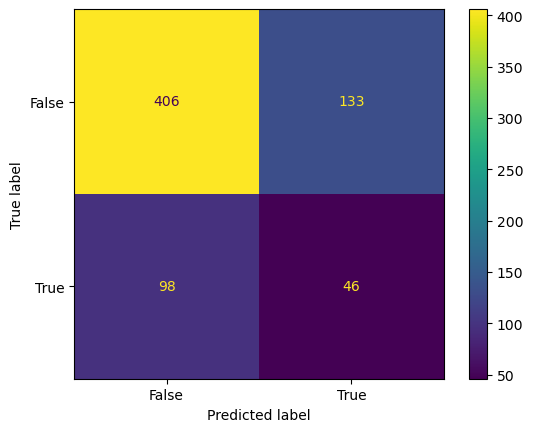

In [95]:
confusion_matrix_(y_val,y_pred)

In [96]:
X_features = X[:,feature_importance_rf_gb[feature_importance_rf_gb['model']== 'Random Forest'].head(20)['feature_no'].to_list()]
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=28)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=28)

dt_classifier = DecisionTreeClassifier(random_state = 28)

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, n_jobs=-1, verbose=1, scoring = 'f1_macro')
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_classifier = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [97]:
best_classifier

DecisionTreeClassifier(max_features='auto', min_samples_split=5,
                       random_state=28)

In [98]:
dt_classifier = DecisionTreeClassifier(max_features='auto', min_samples_split=5,random_state = 28)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_val)

In [99]:
scores(y_val, y_pred)

Accuracy: 0.6705710102489019
Precision: 0.2206896551724138
Recall (Sensitivity): 0.2222222222222222
Specificity: 0.7903525046382189
F1-Score: 0.2214532871972318


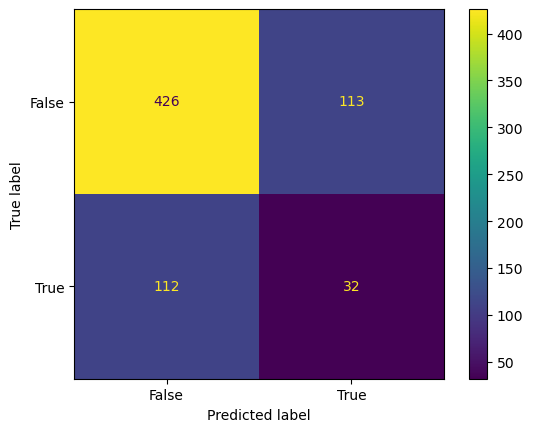

In [100]:
confusion_matrix_(y_val,y_pred)

<font face='Comfortaa'><h4> 6.1.4 (b) XGBClassifier

In [101]:
from xgboost import XGBClassifier

In [102]:
X_features = X[:,feature_importance_rf_gb[feature_importance_rf_gb['model']== 'Gradient Boosting'].head(5)['feature_no'].to_list()]
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=28)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=28)

In [103]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_val)

In [104]:
scores(y_val, y_pred)

Accuracy: 0.7496339677891655
Precision: 0.32
Recall (Sensitivity): 0.16666666666666666
Specificity: 0.9053803339517625
F1-Score: 0.2191780821917808


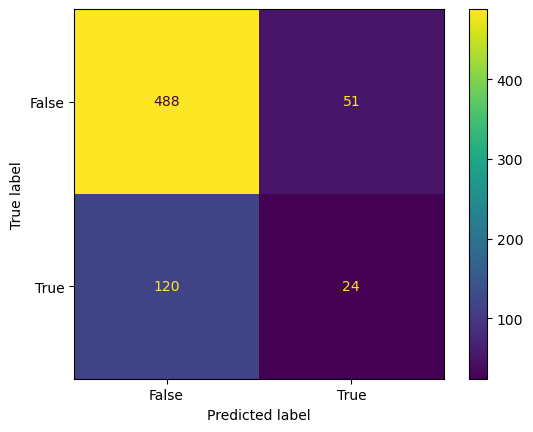

In [105]:
confusion_matrix_(y_val,y_pred)

In [106]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define your XGBoost classifier
xgb_classifier = XGBClassifier()

# Create a parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],       # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],    # Step size shrinkage used in boosting
    'max_depth': [3, 4, 5],               # Maximum depth of each tree
    'min_child_weight': [1, 3, 5],        # Minimum sum of instance weight (hessian) needed in a child
    'gamma': [0, 0.1, 0.2],               # Minimum loss reduction required to make a further partition on a leaf node
    'subsample': [0.8, 0.9, 1.0],         # Fraction of samples used for fitting the trees
    'colsample_bytree': [0.8, 0.9, 1.0],  # Fraction of features used for fitting the trees
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, scoring='f1', cv=5)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)  # X_train and y_train are your training data

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_xgb_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Evaluate the model on your test data
y_pred = best_xgb_classifier.predict(X_val)  # X_test is your test data
f1_score_ = f1_score(y_test, y_pred)  # Calculate the F1 score on the test data
print("F1 Score on Test Data:", f1_score_)

Best Hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 0.8}
F1 Score on Test Data: 0.18410041841004185


In [107]:
X_features = X[:,feature_importance_rf_gb[feature_importance_rf_gb['model']== 'Gradient Boosting'].head(5)['feature_no'].to_list()]
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=28)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=28)

In [108]:
best_xgb_classifier = XGBClassifier(
    colsample_bytree=0.8,
    gamma=0.2,
    learning_rate=0.2,
    max_depth=5,
    min_child_weight=5,
    n_estimators=300,
    subsample=0.8
)

In [109]:
best_xgb_classifier.fit(X_train, y_train)
y_pred = best_xgb_classifier.predict(X_val)

In [110]:
scores(y_val, y_pred)

Accuracy: 0.746705710102489
Precision: 0.3013698630136986
Recall (Sensitivity): 0.1527777777777778
Specificity: 0.9053803339517625
F1-Score: 0.20276497695852536


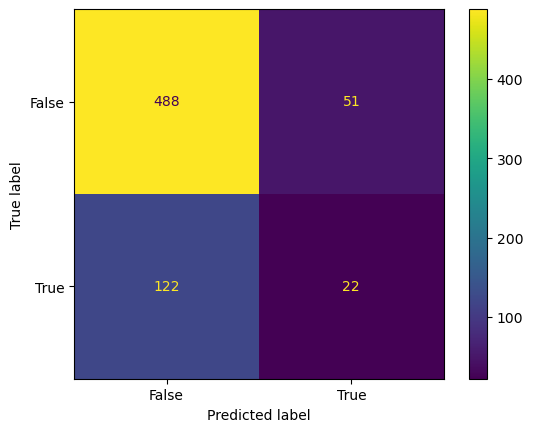

In [111]:
confusion_matrix_(y_val,y_pred)

<font face='Comfortaa'> Both models exhibit diminished performance after undergoing hyperparameter tuning. When analyzing all the metrics, the DecisionTreeClassifier, which achieved a higher F1 score and fewer False Positives before hyperparameter tuning, emerges as the superior overall model. This aligns with the primary objective of predicting high-value leads within the customer pool. It underscores the significance of correctly identifying these high-value leads (recall) since failing to do so could lead to missed opportunities. Nevertheless, it remains crucial to reduce false positives to prevent the allocation of resources to leads that do not genuinely hold high value.